# Survey Model


This notebook summarizes the steps in the development process for our survey model. We have additional code/deep-dives within the [sandbox](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/tree/main/modeling/survey_model_sandbox) folder. We shortened that code & summarized learnings into this file.

### The data

The model leverages a [public dataset](https://wwwn.cdc.gov/nchs/nhanes/default.aspx) from the National Health and Nutrition Examination Survey (NHANES). NHANES is a national survey that monitors the health and nutrional status of adults and children across the US. NHANES is run by the National Center for Health Statistics (NCHS). NCHS is part of centers for disease control and prevention (CDC) and is responsible for producing vital and health statistics for the nation. The public database contains data to 40+ surveys that were each conducted 12 times between 1999-2020. 

### Data Pipeline

We explored roughly half of the survey files available in the database. For our final model we are using 22 different survey files spanning years of 2013-2020. We created a [datapipeline](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/blob/main/pipeline/cdc_agg_pipe.ipynb) which merges and cleans data from these files.

### Model Development Process

#### Model Objective

The objective of our model is to predict whether a survey respondent is depressed. Our project is oriented around predicting PPD. To frame the model towards PPD we are filtering the dataset to only include women that have been pregnant. Hence, we are making the assumption that if a previously pregnant woman is depressed they are suffering from PPD. There are limitations in this approach which we will disuss further. The specific outcome & input variables are listed below;
- The **outcome variable** is binary indicator variable called "MDD". The value is 1 if the individual has been diagnosed & is taking medication related to depression. 
- The **input variables** include 117 features across 7 themes; alcohol & smoking, medical history/conditions, hospitalization usage/access, lifestyle traits, socioeconomic traits, reproductive health, & demographic traits.

#### Guiding Principles

- Model interpretability: The model is meant to screen individuals with risk of depression. If the model is highly accurate, but acts as a black box it won't be very useful in further diagnosing. The respondent and medical practioner should understand what markers are used & how depressed individuals are identified. 
- Less features the better: The model will be surfaced through a front-end web application that requires an individual to answer the survey. The survey needs to be short enough where it is easy to answer. 
- Unethical biases: We need to ensure that the model is able to work effectively across all demographic segments. The key segments we will evaluate are; A) race & B) socioeconomic status.

#### 1) EDA

Summarize key insights from EDA identifying issues with data quality & features that are correlated to the prediction variable.

#### 2) Generate Baseline Models

We explored several options during the training phase in an effort to build the best model and better understand our target sample. We explored the following 6 classifiers for our model;
- Logistic Regression: XXX
- Random Forest: XXX
- Decision Tree: XXX
- K-Nearest Neighbor (KNN): XXX
- Naive Bayes: XXX
- Gradient Boosting Classifier: XXX


Evaluation criteria:
- Primary: Recall given core objective of “screening” & highlighting patients at risk.
- Secondary: F1 to balance precision

#### 3) Error Analysis

We first look at model performance at different groupings; 
- 1) Positive class (depressed_yes): using the evaluation criterion on the observations in the test set that are labelled as depressed (MDD=1). This is the key grouping as we ultimately want to ensure the screener properly flags those with risk.
- 2) Negative class (depressed_no): using the evaluation criterion on the observations in the test set that are labelled as non-depressed (MDD=0). 
- 3) macro average: The artithmetic mean of the evaluation criterion across classes. For example, if the recall of class 1 is 100 and recall of class 0 is 50, then the macro average is 75. 
- 4) weighted avgerage: Similar to macro average as it includes performance across all class, but weights it based on class representation. There are more respondents in the negative class, hence that class will have a larger weighting.

We will particularly focus on the performance of the positive class, hence are mostly optimizing improvements across posittive class & macro avg groupings. 

The objective of our error analysis is to understand features of the test set across false positives, false negatives, true positives, & true negatives. The main lever we will have for improving the model based on the error analysis will be feature selection & feature engineering.


#### 4) Feature Selection

The baseline model will use the 10 depression screener columns. Those columns are standard for screening depression, hence we figure is a reasonable place to start. Our process for feature selection will roughly follow the process below:

Feature selection based on domain knowledge & error analysis; 
 - Domain knowledge: we have identified 7 themes of features identified through a combination of research around common risk markers for depression in addition to our intuitive guess of which features might be predictive. 
 - Error analysis: Based on initial error analysis, we want to understand what are the values among the feature columns where the model is right vs wrong. To improve recall we will start by identifying other features that are correlated to the target column, but importantly, have high variance when existing feature columns may be misleading. For example, if the key column from the depression screener has a low value, but the individual is depressed we want 

#### 5) Feature Engineering

Feature engineering to supplement existing features & enhance existing features;
 - Supplement existing features: We will explore creating custom columns that take other features as inputs. For example, if an individual scored high across multiple depression screener columns we can create a new column as a flag to highlight that. In addition, we will compare whether there are non-linear relationships with variables & create features that are the square of a depression screener question for example.
 - Enhance existing features: We will explore binning continous columns that may have a strong correlation to the target, but are sparse. 

#### 6) Positive Class Imbalance/Preprocessing

Positive class imbalance: Across our entire dataset ~4% of respondents have MDD=1. Among preganant woman, ~10% have MDD=1. We explored 3 stragies to account for this;
- SMOTE: XXX
- Test/Train Proportion: XXX
- Adding additional survey years: XXX

#### 7) Hyperparameter Tuning

Via gridsearch brute force

#### 8) Ensemble Methods

Explore using combination of multiple models in cases where some are less confident in prediction.

#### 9) Segmentation & Bias

Segmentation: Compare performance when across several groups; A) all respondents B) males only C) females only D) females that have been preganant only. This is used to understand potential differences in predicting depression among different audiences. We will also compare performance across subgroups within each of these. For example, measuring performance among previously pregnant females by race.

#### 10) Final Model

Pipeline for creating final model

#### 11) Discussion

Conclusions

Data Limitations

Future research

#### 12) Appendix

# TL'DR

Type the 3 key takeaways from the entire process here

# Setup

### Load Packages

In [1]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance
from random import sample

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
cdc_survey = pd.read_csv('../../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1].reset_index()
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 864)


### Candidate Features

Here we list out all candidate features for our model. We have separate lists containing each feature themes and one final list that includes all features.

In [3]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# hospital usage & access to care
hospital_utilization_n_access_cols = [
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',   
    'have_health_insurance',
    'have_private_insurance',
    'has_health_insurance_gap',       
    'plan_cover_prescriptions'    
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',      
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born'
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    hospital_utilization_n_access_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

115

In [4]:
# cdc_survey_pmom[
#     (cdc_survey_pmom[dep_screener_cols[0]] == 0) & 
#     (cdc_survey_pmom[dep_screener_cols[1]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[2]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[3]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[4]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[5]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[6]] == 0) &
#     (cdc_survey_pmom[dep_screener_cols[7]] == 0) &    
#     (cdc_survey_pmom[dep_screener_cols[8]] == 0) &    
#     (cdc_survey_pmom[dep_screener_cols[9]] == 0)     
# ][dep_screener_cols]

cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
cdc_survey_pmom = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] < 9]
cdc_survey_pmom.shape

(4394, 865)

### Functions

In [5]:
## ###############################################################################
## function to create test & train dataset

def get_model_data(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False,
                   return_indices=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    #cols_to_use.insert(0, 'SEQN')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    indices = np.arange(y.shape[0])
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(
        x, 
        y, 
        indices,
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    if return_indices:
        return x_train, x_test, y_train, y_test, idx_train, idx_test
    else:
        return x_train, x_test, y_train, y_test

## ###############################################################################
## Function to get performance across different models

def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy'][0]
    
    column_key = {
        '0':'Depressed (No)',
         '1':'Depressed (Yes)',
         'accuracy':'accuracy',
         'macro avg':'Macro Avg',
         'weighted avg':'Weighted Avg'
    }

    # rename grouping
    result_table.columns = [column_key.get(key) for key in result_table.columns]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = [accuracies for i in range(result_table.shape[0])]
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    # test
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    # train
    pred_labels_knn_train  = knn.predict(x_train)
    score_knn_train = get_performance_df(y_train, pred_labels_knn_train,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    # test 
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
    # train 
    pred_labels_lr_train  = lm.predict(x_train)
    score_lr_train = get_performance_df(y_train, pred_labels_lr_train,'Logistic Regression')    
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    # test 
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
    # train 
    pred_labels_bnb_train  = bnb.predict(x_train)
    score_bnb_train = get_performance_df(y_train, pred_labels_bnb_train,'Bernoulli Naive Bayes')       
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    # test 
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
    # train 
    pred_labels_gnb_train  = gnb.predict(x_train)
    score_gnb_train = get_performance_df(y_train, pred_labels_gnb_train,'Gaussian Naive Bayes')         

    # Random Forest
    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    # test     
    pred_labels_rf  = rf.predict(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    # train 
    pred_labels_rf_train  = rf.predict(x_train)
    score_rf_train = get_performance_df(y_train, pred_labels_rf_train,'Random Forest')         
    
    #Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    # test
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')
    # train 
    pred_labels_dt_train  = dt.predict(x_train)
    score_dt_train = get_performance_df(y_train, pred_labels_dt_train,'Decision Tree')          

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    # test 
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    # train 
    pred_labels_gb_train  = gb.predict(x_train)
    score_gb_train = get_performance_df(y_train, pred_labels_gb_train,'Gradient Boosting Classifier')     
    
    # make dataframe with scores (on test data)
    scores_test = pd.concat(
        [score_knn, 
         score_lr, 
         score_bnb, 
         score_gnb, 
         score_rf, 
         score_dt, 
         score_gb]
    )
    scores_test = scores_test.sort_values(by = 'recall', ascending=False)
    
    # make dataframe with scores (on train data)
    scores_train = pd.concat(
        [score_knn_train, 
         score_lr_train, 
         score_bnb_train, 
         score_gnb_train, 
         score_rf_train, 
         score_dt_train, 
         score_gb_train]
    )
    scores_train = scores_train.sort_values(by = 'recall', ascending=False)    
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores_test, predictions, scores_train

## ###############################################################################
## Functions for Error analysis

def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def get_error_data(
    y_actuals, 
    y_predictions,
    x_test_matrix,
    x_test_columns):
    """
    Function that creates a clean dataset to perform error analysis on test observations.
    """    
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    # feature df 
    feature_df = pd.DataFrame(x_test_matrix, columns = x_test_columns)

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)
    
    return pred_data

def create_error_plots(
    prediction_data,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=False):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=prediction_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = prediction_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()

# 1) Exploratory Data Analyais

We spent the first few weeks exploring our data. We have a folder of our EDA [here](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/tree/main/eda), but we highlight the key findings in this section.

The key aspects we looked at include;
- Data coverage based on what % of values are null across each feature. Our classifiers do not allow null values to be used, hence we'll either need to drop null values or impute values for these.
- Feature correlation based on a features correlation to the target column (MDD). 
- Feature sparsity by measuring whether a variable has a large range of values versus a few discrete options. This will come into play when we explore feature engineering.

We first measured the % of observation that are within the positive class.

In [6]:
print(f"Across the entire dataset {round(cdc_survey['MDD'].mean()*100,2)}% of observations are within the positive class")
print(f"Among females that have been pregnant {round(cdc_survey_pmom['MDD'].mean()*100,2)}% of observations are within the positive class")

Across the entire dataset 4.23% of observations are within the positive class
Among females that have been pregnant 14.36% of observations are within the positive class


We defined a function to perform a univariate analysis per feature. This creates a dataframe that has 1 row per feature & stores key stats for it.

The primary columns include;
- **corr** = the pearson correlation between a feature & target (MDD)
- **corr_abs** = the absolute value of the corr column
- **unique_values** = # of discrete values within a features domain
- **pct_null** = % of values that are null

In addition, for every feature we calculate the % of observations where MDD=1 by each discrete value in its domain. We then compare the min, max, & std deviation across value averages. For example, feeling_down_depressed_hopeless has 4 values {0,1,2,3} per the chart below;

In [7]:
cdc_survey_pmom.groupby('feeling_down_depressed_hopeless') \
   .agg({'MDD':'mean', 'SEQN':'count'}) \
   .reset_index() \
   .rename(columns={'MDD':'pct_MDD','SEQN':'num_responses'})

,feeling_down_depressed_hopeless,pct_MDD,num_responses
0,0.0,0.073091,2148
1,1.0,0.178668,1472
2,2.0,0.227979,386
3,3.0,0.352201,318


Per the image above, the min and max are 0.05 & 0.35 respectively. We then calculate a value that is max_minus_min to see clearly how well this feature separates negative & postive class observations. We filter for values that have 30+ responses to reduce noise from sparse features.

These columns are plotted in the univariate analysis as;
- **min** = min pct_target across values with 30+ responses
- **max** = max pct_target across values with 30+ responses
- **std** = std deviation pct_target across values with 30+ responses
- **max_minus_min** = max - min columns.

In [8]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD',
    show_plot=False):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        if show_plot:
            print(f"\n{col}\n")
            print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[df_to_use[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(df_to_use[['MDD',col]].corr().iloc[1,0])],            
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate.shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values

The cell block below creates a summary table showing the totals per feature. The final column we add is **feature theme** which groups the features into their respective themes. We display the top 20 features based on the corr_abs column.

In [9]:
## ##########################
## Calculate null value percent by feature

null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)

## ##########################
## Univariate per feature 

univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)

## ##########################
## merge

univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_summary = univariate_summary.sort_values(by = 'corr_abs', ascending=False)

## ##########################
## create theme column

def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in hospital_utilization_n_access_cols:
        return 'hospital_utilization_n_access'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'     
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    

cols = ['feature','corr','corr_abs','unique_values','pct_null','max_minus_min','min','max','std','feature_theme']
univariate_summary[cols].iloc[:20,:]

,feature,corr,corr_abs,unique_values,pct_null,max_minus_min,min,max,std,feature_theme
62,seen_mental_health_professional,-0.285151,0.285151,2,0.000455,0.285340,0.102578,0.387917,0.201766,hospital_utilization_n_access
9,difficult_doing_daytoday_tasks,0.233872,0.233872,4,0.016614,0.345576,0.090068,0.435644,0.147316,dep_screener
1,feeling_down_depressed_hopeless,0.231683,0.231683,4,0.015931,0.279110,0.073091,0.352201,0.115836,dep_screener
5,feeling_bad_about_yourself,0.189521,0.189521,4,0.015476,0.228091,0.098757,0.326848,0.093339,dep_screener
17,times_with_12plus_alc,-0.187103,0.187103,9,0.974738,0.000000,0.181818,0.181818,NaN,alcohol_n_smoking
3,feeling_tired_or_having_little_energy,0.179011,0.179011,4,0.014565,0.192688,0.071984,0.264672,0.083541,dep_screener
6,trouble_concentrating,0.173977,0.173977,4,0.014338,0.190879,0.103424,0.294304,0.080958,dep_screener
0,little_interest_in_doing_things,0.154489,0.154489,4,0.015931,0.182188,0.095440,0.277628,0.074906,dep_screener
26,arthritis,-0.152651,0.152651,2,0.003641,0.108420,0.097938,0.206358,0.076664,med_condition
63,count_days_seen_doctor_12mo,0.144824,0.144824,18,0.868457,0.240878,0.153061,0.393939,0.090612,hospital_utilization_n_access


In [10]:
Counter(univariate_summary[cols].iloc[:20,:]['feature_theme'])

Counter({'hospital_utilization_n_access': 3,
         'dep_screener': 10,
         'alcohol_n_smoking': 1,
         'med_condition': 6})

In [11]:
univariate_summary.shape

(115, 12)

The strongest features have a moderate signal with the strongest correlation strength being approx 0.3. Here we also see that the depression screener theme is the most prevalent of the top 20. We subsequently calculate the average by theme.

In [12]:
univariate_summary[cols].groupby('feature_theme') \
    .mean() \
    .reset_index() \
    .sort_values(by = 'corr_abs', ascending=False)

,feature_theme,corr,corr_abs,pct_null,max_minus_min,min,max,std
2,dep_screener,0.162456,0.162456,0.015248,0.205970,0.101097,0.307067,0.087199
3,hospital_utilization_n_access,-0.041325,0.094893,0.355443,0.102105,0.097247,0.199352,0.060909
5,med_condition,-0.041557,0.062954,0.263920,0.070777,0.128648,0.199425,0.042661
0,alcohol_n_smoking,-0.041851,0.053981,0.515533,0.079291,0.112314,0.191605,0.039189
1,demographic,0.037243,0.048560,0.108756,0.101048,0.092512,0.193560,0.035108
4,lifestyle,0.033594,0.045995,0.277330,0.084788,0.109880,0.194667,0.033735
7,socioeconomic,-0.019181,0.037682,0.359939,0.056798,0.102542,0.159340,0.025594
6,reproductive_health,-0.011208,0.036728,0.304506,0.085386,0.101178,0.186564,0.033046


In [13]:
univariate_summary[cols].groupby('feature_theme')['feature'] \
    .count() \
    .reset_index()

,feature_theme,feature
0,alcohol_n_smoking,12
1,demographic,8
2,dep_screener,10
3,hospital_utilization_n_access,11
4,lifestyle,17
5,med_condition,36
6,reproductive_health,14
7,socioeconomic,7


**Key Learnings From EDA**
- The strongest features have a moderate signal with the strongest correlation strength being approx 0.3.
- Top 3 feature themes are depression screener, hospitalization utilization & access, & medical conditions. This makes logical sense as the depression screener is designed to evaluate depression. The hospitalization utilization also make sense where the top feature is "seen_mental_health_professional" which we'd expect to be correlated to an individual taking medication for depression.
- Outside of the depression screener theme the other features have between 10-50% null value exposure. 

# 2) Generate Baseline Models

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [14]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3515, 10)
(879, 10)
(3515,)
(879,)


The baseline models use an 80:20 split ratio. The sizes of our training and test datasets are 6.2k & 1.5k records respectively.

In [15]:
perf_test_baseline, predictions, perf_train_baseline = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

perf_test_baseline_weight = perf_test_baseline[perf_test_baseline['grouping'] == 'Weighted Avg']
perf_test_baseline_weight[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
3,Logistic Regression,0.846416,0.790476,0.820411,0.846416
3,Gradient Boosting Classifier,0.841866,0.787678,0.797469,0.841866
3,Knn,0.835040,0.792416,0.785790,0.835040
3,Random Forest,0.823663,0.783712,0.767810,0.823663
3,Bernoulli Naive Bayes,0.797497,0.795064,0.792770,0.797497
3,Gaussian Naive Bayes,0.796359,0.798358,0.800462,0.796359
3,Decision Tree,0.784983,0.773807,0.764460,0.784983


The data above shows the weighted average performance across our 7 classifiers. The performance is quite good when measuring the weighted average. However, given the positive class imbalance where approx 4% of observations are within the positive class, these can be slightly misleading. That being said the industry baseline using the Edinburgh Postnatal Depression Scale (EPDS) is about 85% recall & precision ([source](https://pubmed.ncbi.nlm.nih.gov/33177069/#:~:text=Among%20studies%20with%20a%20semi,off%20value%20of%2011%20or)).

**TODO: Validate whether the baseline is based on weighted or macro avg**

In [16]:
perf_test_baseline_macro = perf_test_baseline[perf_test_baseline['grouping'] == 'Macro Avg']
perf_test_baseline_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
2,Gaussian Naive Bayes,0.629934,0.627310,0.624930,0.796359
2,Bernoulli Naive Bayes,0.610347,0.612902,0.615781,0.797497
2,Decision Tree,0.553692,0.557858,0.566186,0.784983
2,Knn,0.542934,0.544538,0.642582,0.835040
2,Random Forest,0.533274,0.531812,0.591727,0.823663
2,Logistic Regression,0.532331,0.522408,0.758102,0.846416
2,Gradient Boosting Classifier,0.529625,0.519428,0.687576,0.841866


Given the known class imbalance we look at the performance across 4 groupings defined above.

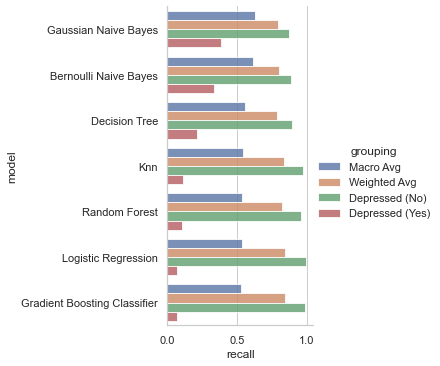

In [17]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

Based on the macro average, the naive bayes's classifiers perform the best. This is because the other models do a very poor job (recall < 0.17) among the positive class (Depressed Yes) group.

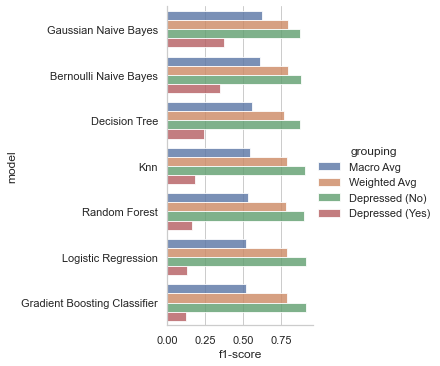

In [18]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='f1-score', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),    
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

Based on our secondary evaluation criteria (F1-Score) the story remains the same. But, among the naive bayes models, the F1-score is slightly worse indicating precision is not great (see charts below). We are less concerned with this given the objective of this being a screener model. But, we will measure our ability to improve precision in addition to recall.

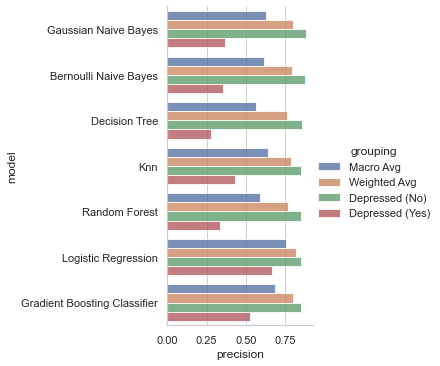

In [19]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='precision', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),    
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

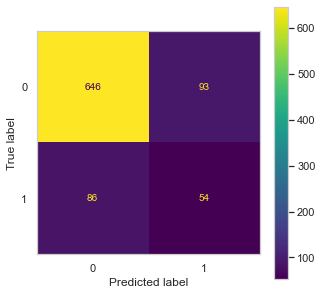

In [20]:
plot_confusion_matrix(
    y_test = predictions['actuals'], 
    pred_labels = predictions['pred_gaussian_naive_bayes']
)

# 3) Error Analysis

- **Part (1):** Error analysis by feature. Here we decompose the feature distribution across cases where the model does a good & bad job. We try to get an intuition into how we can build on the model so it improves in places it previously does bad.
- **Part (2):** Explore predicted probabilities of naive bayes classifiers. The naive bayes appear to be the best classifier initially. We want to better understand how performance looks when the model is more confident in the prediction. This will help us further understand the types of observations it performs poorly on. 

## Part 1

We focus on understanding the distribution of our feature values in cases where the model is correct vs incorrect. We start by creating a dataset that has 1 row per test observation. We create a column that has the actual Y along with the predicted Y from the best model (Bernoulli Naive Bayes). We also append the feature variables for each record so we can gain an intuition around the distribution of feature values across each TP, TN, FP, FN.

In [21]:
pred_data_bnb = get_error_data(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_bernoulli_naive_bayes'],
    x_test_matrix = x_test,
    x_test_columns = dep_screener_cols,
)

pred_data_bnb.iloc[:5,:]

,y_actual,y_pred,label,little_interest_in_doing_things,feeling_down_depressed_hopeless,trouble_falling_or_staying_asleep,feeling_tired_or_having_little_energy,poor_appetitie_or_overeating,feeling_bad_about_yourself,trouble_concentrating,moving_or_speaking_to_slowly_or_fast,thoughts_you_would_be_better_off_dead,difficult_doing_daytoday_tasks
0,1,1,TP,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,0.0,3.0
1,0,0,TN,0.0,-1.0,-0.5,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,TN,-1.0,-1.0,-0.5,0.0,-1.0,0.0,1.0,0.0,0.0,0.0
3,0,1,FP,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,0.0,1.0
4,1,0,FN,-1.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Below we plot a chart that shows the feature value distribution among the FN, FP, TN, & TP observrations. We start by looking at the depression screener features that had the highest correlation to target. In the chart below, the x-axis is the feature value for the observation. The y-axis represents the % of label values that have that feature. For example, in the first chart that plots "feeling_down_depressed_hopeliness" we see that approx 70% of the false negatives have feeling_down_depressed_hopeliness=0.

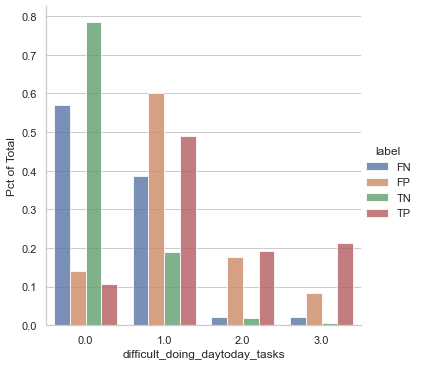

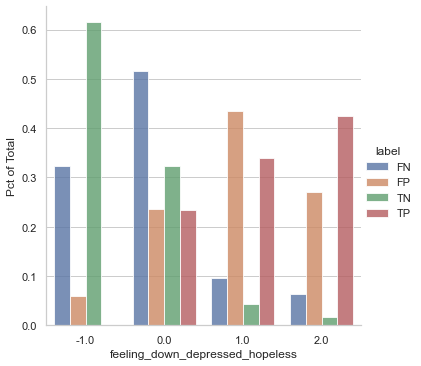

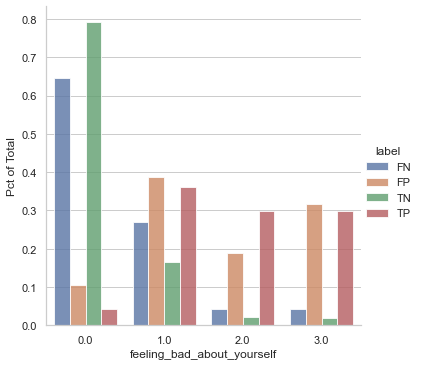

In [22]:
dep_screener_univariate = univariate_summary[univariate_summary['feature'].isin(dep_screener_cols)]
dep_screener_univariate = dep_screener_univariate[['feature','corr_abs']]

create_error_plots(
    prediction_data = pred_data_bnb,
    columns_to_plot = list(dep_screener_univariate['feature'])[:3]
)

We subsequently plot the overall distribution average across each feature column. We contextualize the column by adding a column from the eda (corr_abs) & create a feature importance from the random forest model. 

In [23]:
## ##########################
## stats by prediction label

# aggregate features by label
pred_data_bnb_summary = pred_data_bnb.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_bnb_summary['label'] = pd.Categorical(
    pred_data_bnb_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_bnb_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_bnb_summary = pred_data_bnb_summary.T.reset_index()

## ##########################
## merge column correlation & feature importance 

dep_screener_univariate = univariate_summary[univariate_summary['feature'].isin(dep_screener_cols)]
dep_screener_univariate = dep_screener_univariate[['feature','corr_abs']]
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    dep_screener_univariate, 
    left_on='index', 
    right_on='feature', 
    how = 'left'
)

# fit random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_importances = pd.DataFrame({'Feature': dep_screener_cols,'Feature Importance (RF)': importances})
feature_importances = feature_importances.sort_values('Feature Importance (RF)',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    feature_importances, 
    left_on='index', 
    right_on='Feature', 
    how = 'left'
)


## ##########################
## sanitize

# drop duplicate column
pred_data_bnb_summary.drop(columns=['feature','Feature'], inplace=True)

## remove unneeded rows
pred_data_bnb_summary = pred_data_bnb_summary[~pred_data_bnb_summary['index'] \
                                              .isin(['y_actual','y_pred','label'])]

# # order by feature importance
pred_data_bnb_summary = pred_data_bnb_summary.sort_values(by='corr_abs',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})

pred_data_bnb_summary

,Feature,TP,FP,TN,FN,corr_abs,Feature Importance (RF)
12,difficult_doing_daytoday_tasks,1.51,1.2,0.24,0.49,0.233872,0.091055
4,feeling_down_depressed_hopeless,1.19,0.92,-0.54,-0.1,0.231683,0.104564
8,feeling_bad_about_yourself,1.85,1.72,0.27,0.48,0.189521,0.096930
6,feeling_tired_or_having_little_energy,1.49,1.36,0.26,0.52,0.179011,0.106803
9,trouble_concentrating,1.79,1.48,0.33,0.41,0.173977,0.103810
3,little_interest_in_doing_things,1.11,0.79,-0.43,-0.32,0.154489,0.110664
7,poor_appetitie_or_overeating,0.83,0.73,-0.37,-0.25,0.130911,0.126896
5,trouble_falling_or_staying_asleep,0.56,0.53,0.04,0.08,0.112999,0.123333
10,moving_or_speaking_to_slowly_or_fast,1.21,1.04,0.19,0.23,0.110152,0.090532
11,thoughts_you_would_be_better_off_dead,0.49,0.35,0.03,0.08,0.107941,0.045412


In the chart below, each row is a feature in the model. We summarize the average response for each label group. For example, we see that the avg response for "feeling_down_depressed_hopeless" among the true positives is 1.68 while it is 0.15 for the true negatives. 

**Key learnings** 
- The depression screener features are generally doing their job. The majority of the true positives are towards the high end of these columns and the majoirty of the true negatives are towards the bottom of these. 
- The depression screeners have false reads. For example, we see most of the false negatives occur when the individual replies low on these values, but is actually within the positive class. 
- Our most actionable lever is likely through feature selection to see if there are other variables that can act as a "fall back" to when these screeners show a false read.

## Part 2

We subsequently explore performance of the naive bayes model based on its confidence.

In [24]:
## ##########################
## Train a Gaussian naive bayes classsifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

## ##########################
## store the predicted probabilities of a 0 & 1 prediction
pred_prob = pd.DataFrame(gnb.predict_proba(x_test))
pred_prob.columns = ['depressed_no_prob','depressed_yes_prob']
pred_prob['y_pred'] = predictions['pred_bernoulli_naive_bayes']
pred_prob['y_actual'] = predictions['actuals']

# bin the probabilities into groups of 20%
bin_labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_prob['depressed_yes_prob_bin'] = pd.cut(
    pred_prob['depressed_yes_prob'], 
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, np.inf],
    labels=bin_labels
)

# calculate prediction label
pred_prob['label'] = pred_prob.apply(label_pred, axis = 1)
pred_prob['count_FN'] = pred_prob['label'] == "FN"
pred_prob['count_TN'] = pred_prob['label'] == "TN"
pred_prob['count_FP'] = pred_prob['label'] == "FP"
pred_prob['count_TP'] = pred_prob['label'] == "TP"
pred_prob['sample_size'] = 1

# summarize observations by predicted probability
cols = ['y_pred','y_actual','count_FN','count_TN','count_FP','count_TP','sample_size']
pred_prob_summary = pred_prob.groupby(['depressed_yes_prob_bin'])[cols].sum().reset_index()
pred_prob_summary['recall'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FN'])
pred_prob_summary['precision'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FP'])
pred_prob_summary['sample_size (% of total)'] = pred_prob_summary['sample_size'] / pred_prob_summary['sample_size'].sum()
pred_prob_summary

,depressed_yes_prob_bin,y_pred,y_actual,count_FN,count_TN,count_FP,count_TP,sample_size,recall,precision,sample_size (% of total)
0,0.0,2,64,64,573,2,0,639,0.000000,0.000000,0.726962
1,0.1,8,8,7,27,7,1,42,0.125000,0.125000,0.047782
2,0.2,8,7,4,11,5,3,23,0.428571,0.375000,0.026166
3,0.3,8,6,3,7,5,3,18,0.500000,0.375000,0.020478
4,0.4,5,1,1,4,5,0,10,0.000000,0.000000,0.011377
5,0.5,7,3,2,2,6,1,11,0.333333,0.142857,0.012514
6,0.6,8,7,2,9,3,5,19,0.714286,0.625000,0.021615
7,0.7,6,3,2,4,5,1,12,0.333333,0.166667,0.013652
8,0.8,7,4,2,5,5,2,14,0.500000,0.285714,0.015927
9,0.9,73,37,6,12,42,31,91,0.837838,0.424658,0.103527


In [25]:
print(f"Among the test set {round(np.mean(y_test)*100,2)}% of observations are in the positive class")

Among the test set 15.93% of observations are in the positive class


The model has better precision and recall once the predicted probability the observation is within the positive class which is good. But, 90% of the false negatives occur when the model's predicted probability of MDD=1 is less than 10%. This is where we want to focus feature selection. 

Given the learnings from the first part of the error analysis, we hypothesize many of these instances are when the observation has reported 0 across many of the depression screeners. In the table below we calculated 4 new columns;
- num_dep_screener_0 = The number of screener questions the individual responded with 0 (lowest score)
- num_dep_screener_1 = The number of screener questions the individual responded with 1
- num_dep_screener_2 = The number of screener questions the individual responded with 2
- num_dep_screener_3 = The number of screener questions the individual responded with 3 (highest score)

In [26]:
pred_prob_with_features = pd.concat([
    pred_prob, 
    # column bind test observations with their original values
    cdc_survey_pmom.iloc[idx_test][dep_screener_cols].reset_index()
], axis=1)

#pred_prob_with_features

pred_prob_with_features['num_dep_screener_0'] = (pred_prob_with_features[dep_screener_cols]==0).sum(axis=1)
pred_prob_with_features['num_dep_screener_1'] = (pred_prob_with_features[dep_screener_cols]==1).sum(axis=1)
pred_prob_with_features['num_dep_screener_2'] = (pred_prob_with_features[dep_screener_cols]==2).sum(axis=1)
pred_prob_with_features['num_dep_screener_3'] = (pred_prob_with_features[dep_screener_cols]==3).sum(axis=1)

pred_prob_with_features.groupby(['depressed_yes_prob_bin'])['sample_size'].sum().reset_index()
cols = ['num_dep_screener_0','num_dep_screener_1','num_dep_screener_2','num_dep_screener_3']

pred_prob_with_features.groupby(['depressed_yes_prob_bin'])[cols].median().reset_index()

,depressed_yes_prob_bin,num_dep_screener_0,num_dep_screener_1,num_dep_screener_2,num_dep_screener_3
0,0.0,7.0,2.0,0.0,0.0
1,0.1,4.0,4.0,1.0,1.0
2,0.2,4.0,4.0,2.0,1.0
3,0.3,3.0,4.0,1.5,1.0
4,0.4,3.0,4.5,1.0,1.0
5,0.5,3.0,3.0,2.0,2.0
6,0.6,3.0,3.0,2.0,2.0
7,0.7,3.0,3.5,1.0,2.0
8,0.8,3.0,2.5,1.0,2.5
9,0.9,2.0,2.0,1.0,4.0


In the table above we show the median value for the 4 new created columns by the predicted model probability. Notably, within the 0.0 bin group an individual, on average, **has responded 0 for at least 9 of the depression screeners**. When the predicted probability increases past 10% the average drops to 6. Hence, the model assigns a lot of value for at least one dep screener response above 0. This emphasizes that the model does poorly when the depression screeners provide a "false read" where the individual provides a 0 but they are in the positive class. This also gives us a great filter to explore additional features. For example, we will evaluate additional features correlated to outcome variable when 9+ of the screeners are answered as 0.

# 4) Feature Selection

- **Part (1):** Explore variables by theme separately. The objective here is to build an intuition of the general predictive power of the different features. They will help contextualize performance of models that use features across multiple themes.

- **Part (2):** Explore baseline model (depression screener questions) in addition to a specific theme. The approach here is to methodically add a single theme on top of the baseline. This will help us further understand which combination of features will help supplement the screener questions. 

- **Part (3):** Explore adding features across **multiple** themes in addition to the baseline features. We ultimately anticipate this will be the most impactful model as it can account for heterogeneity across several aspects of an individual. Adding every single feature into a model will likely make the model biased towards the training dataset. To account for that we will explore adding in the top X additional features. We will model predicitng the top X additional features in two methods
 - Method 1: of the remaining features, sort based on their correlation strength to the outcome variable. This should generally help prioritize adding the next most predictive features.
 - Method 2: we will use the same approach as method 1 by finding the correlation strength to the target, but subset the data beforehand. Based on the error analysis, we found that the model performed poorly when the depression screeners were all reported low (i.e 0s & 1s). Hence, we will calculate the correlation strength among observations that had low depression screener responses.
 
The feature themes are defined in the code block below. We also show the feature within each theme that is most correlated to the target

In [27]:
feature_themes = [
    'dep_screener',
    'hospital_utilization_n_access',
    'alcohol_n_smoking',
    'reproductive_health',
    'med_condition',
    'lifestyle',
    'demographic',
    'socioeconomic'
]

univariate_summary.groupby('feature_theme') \
    .first() \
    .reset_index() \
    .sort_values(by = 'corr_abs', ascending=False)

,feature_theme,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
3,hospital_utilization_n_access,seen_mental_health_professional,-0.285151,0.285151,0.201766,0.102578,0.387917,2,MDD,0.285340,2,0.000455
2,dep_screener,difficult_doing_daytoday_tasks,0.233872,0.233872,0.147316,0.090068,0.435644,4,MDD,0.345576,73,0.016614
0,alcohol_n_smoking,times_with_12plus_alc,-0.187103,0.187103,0.051710,0.181818,0.181818,9,MDD,0.000000,4283,0.974738
5,med_condition,arthritis,-0.152651,0.152651,0.076664,0.097938,0.206358,2,MDD,0.108420,16,0.003641
1,demographic,is_usa_born,0.103961,0.103961,0.057880,0.084237,0.166092,2,MDD,0.081855,4,0.000910
6,reproductive_health,horomones_not_bc,-0.099792,0.099792,0.061952,0.126180,0.213793,2,MDD,0.087613,29,0.006600
4,lifestyle,count_lost_10plus_pounds,0.095045,0.095045,0.056549,0.138790,0.242009,4,MDD,0.103219,2488,0.566227
7,socioeconomic,food_stamps_used,-0.077554,0.077554,0.038613,0.117758,0.172365,2,MDD,0.054607,165,0.037551


## Part 1

Measure model performance when using only a single group of features by theme.

In [28]:
# dataframe to store performance across models
perf_by_theme = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

# build a model across each theme
for theme in feature_themes:
    feature_columns = list(univariate_summary[univariate_summary['feature_theme'] == theme]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = feature_columns
    )

    perf_test_theme, predictions, perf_train_theme = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    perf_test_theme['theme'] = theme
    perf_by_theme = pd.concat([perf_by_theme, perf_test_theme])     

In [29]:
def create_alt_plot_theme(dataset, x_col, x_name, y_col, y_name):
    chart = alt.Chart(dataset).mark_bar().encode(
        x = alt.X(x_col, title=x_name, axis=alt.Axis(labelAngle=-45)),
        y = alt.Y(y_col, title=y_name, scale=alt.Scale(domain=[0, 1])),
        color='theme:N',
    ).facet(
        facet=alt.Facet('model')
    )
    
    return chart

In [30]:
perf_by_theme.sort_values(by = 'recall', ascending=False, inplace=True)
perf_by_theme

,model,grouping,precision,recall,f1-score,support,accuracy,theme
0,Random Forest,Depressed (No),0.840728,1.0,0.913473,739.0,0.840728,med_condition
0,Bernoulli Naive Bayes,Depressed (No),0.840728,1.0,0.913473,739.0,0.840728,hospital_utilization_n_access
0,Bernoulli Naive Bayes,Depressed (No),0.840728,1.0,0.913473,739.0,0.840728,alcohol_n_smoking
0,Gradient Boosting Classifier,Depressed (No),0.840728,1.0,0.913473,739.0,0.840728,alcohol_n_smoking
0,Logistic Regression,Depressed (No),0.840728,1.0,0.913473,739.0,0.840728,alcohol_n_smoking
...,...,...,...,...,...,...,...,...
1,Bernoulli Naive Bayes,Depressed (Yes),0.000000,0.0,0.000000,140.0,0.840728,reproductive_health
1,Gradient Boosting Classifier,Depressed (Yes),0.000000,0.0,0.000000,140.0,0.839590,reproductive_health
1,Bernoulli Naive Bayes,Depressed (Yes),0.000000,0.0,0.000000,140.0,0.840728,med_condition
1,Random Forest,Depressed (Yes),0.000000,0.0,0.000000,140.0,0.840728,med_condition


We plot the performance of the best model per theme below. Here we see the depression screeners perform the best as a standalone model. We also notice that the ranking of the model performance by theme the same as the ranking of average correlation strength to target done in the EDA section above.

In [31]:
perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
7,socioeconomic,Knn,0.523835,0.508257,0.690278
1,demographic,Decision Tree,0.530611,0.532109,0.535268
6,reproductive_health,Gaussian Naive Bayes,0.536623,0.539544,0.556739
4,lifestyle,Decision Tree,0.541702,0.542509,0.543485
0,alcohol_n_smoking,Gaussian Naive Bayes,0.550319,0.533378,0.535175
5,med_condition,Gaussian Naive Bayes,0.581142,0.567538,0.563173
2,dep_screener,Gaussian Naive Bayes,0.629934,0.627310,0.624930
3,hospital_utilization_n_access,Gaussian Naive Bayes,0.666789,0.594413,0.598416


In [32]:
perf_by_theme[perf_by_theme['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
7,socioeconomic,Knn,0.057143,0.103226,0.533333
6,reproductive_health,Gaussian Naive Bayes,0.157143,0.196429,0.261905
1,demographic,Decision Tree,0.185714,0.201550,0.220339
4,lifestyle,Decision Tree,0.221429,0.227106,0.233083
0,alcohol_n_smoking,Gaussian Naive Bayes,0.342857,0.261580,0.211454
5,med_condition,Gaussian Naive Bayes,0.357143,0.299401,0.257732
2,dep_screener,Gaussian Naive Bayes,0.385714,0.376307,0.367347
3,hospital_utilization_n_access,Gaussian Naive Bayes,0.628571,0.394619,0.287582


For completeness we display the performance by theme by model to see if a specific model disproportionately does better for a theme. We see the naive bayes models do best for the top 3 themes. The performance is relatively identical across themes among the other models.

In [33]:
by_theme_recall = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme_f1 = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'F1 Score'
) 

In [34]:
by_theme_recall  

alt.FacetChart(...)

In [35]:
by_theme_f1

alt.FacetChart(...)

## Part 2

We subsequently plot the model performance when adding a group of columns. Given some themes have more column, we take the top 20 values per theme to remove any variance caused by some themes having substantially more features.

In [36]:
# dataframe to store results.
perf_by_theme_inc = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

# test adding in each theme in addition to baseline
themes_to_inc = [theme for theme in feature_themes if theme not in ['dep_screener']]

for theme in themes_to_inc:
    
    # find top 20 features for that theme
    top_additional_candidates = list(univariate_summary[univariate_summary['feature_theme'] == theme].iloc[:20,:]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    baseline_model['theme'] = theme
    perf_by_theme_inc = pd.concat([perf_by_theme_inc, baseline_model])
    
# add in baseline to give context to incr benefit
perf_by_theme_inc = pd.concat([perf_by_theme_inc, perf_by_theme[(perf_by_theme['theme'] == "dep_screener")]])


# define description
def create_theme_col_desc(value):
    if value in 'dep_screener':
        return 'Baseline (dep_screener only)'
    elif value in 'alcohol_n_smoking':
        return '+ alcohol_n_smoking'
    elif value in 'med_condition':
        return '+ med_condition'
    elif value in 'lifestyle':
        return '+ lifestyle'
    elif value in 'hospital_utilization_n_access':
        return '+ hospital_utilization_n_access'
    elif value in 'socioeconomic':
        return '+ socioeconomic'
    elif value in 'reproductive_health':
        return '+ reproductive_health'
    elif value in 'demographic':
        return '+ demographic' 

perf_by_theme_inc['theme_desc'] = perf_by_theme_inc['theme'].map(create_theme_col_desc)

We display a similar table showing the best model across each combination of matrix features. "+ {{feature theme}}" means that model includes the baseline plus the top 20 features from that theme. There are 3 themes that improve performance on top of the baseline. Interestingly, demographic features as a standalone do not perform well, but they are a useful incremental theme on top of the baseline. 


In terms of performance, the improvement is in recall rather than precision. This is good as its our primary objective, but highlights there is still a lot of heterogeneity across the positive class. The hypothesis is the additional features help identify edge cases, but it is still somewhat random across those within the positive class.

For our next section when we add features across multiple themes, we'd expect these top 3 performing themes to have slightly higher representation.

In [37]:
perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
5,+ reproductive_health,Gaussian Naive Bayes,0.623168,0.617136,0.612418
7,Baseline (dep_screener only),Gaussian Naive Bayes,0.629934,0.627310,0.624930
1,+ demographic,Gaussian Naive Bayes,0.635047,0.630389,0.626439
3,+ lifestyle,Gaussian Naive Bayes,0.635912,0.629291,0.624049
6,+ socioeconomic,Gaussian Naive Bayes,0.640160,0.633342,0.627927
0,+ alcohol_n_smoking,Gaussian Naive Bayes,0.640315,0.614015,0.604361
4,+ med_condition,Gaussian Naive Bayes,0.676329,0.645809,0.632484
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.718775,0.659354,0.644640


In [38]:
perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
5,+ reproductive_health,Gaussian Naive Bayes,0.385714,0.363636,0.343949
7,Baseline (dep_screener only),Gaussian Naive Bayes,0.385714,0.376307,0.367347
1,+ demographic,Gaussian Naive Bayes,0.400000,0.383562,0.368421
3,+ lifestyle,Gaussian Naive Bayes,0.407143,0.383838,0.363057
6,+ socioeconomic,Gaussian Naive Bayes,0.414286,0.390572,0.369427
0,+ alcohol_n_smoking,Gaussian Naive Bayes,0.471429,0.380403,0.318841
4,+ med_condition,Gaussian Naive Bayes,0.528571,0.430233,0.362745
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.650000,0.469072,0.366935


## Part 3

Here we explore adding features across multiple themes. We have two primary methods as defined in the intro to this section. For method 2, when we subset to observations with low depression screener we attempt two frameworks. The first is by subseting the records that have 0s across the 3 most important features in the baseline model. The second subsets to records where the baseline model has low confidence in the probability of MDD=1 (part 2 of error analysis section).

In [39]:
def create_candidate_feature_matrix(df_to_use = cdc_survey_pmom, features = candidate_features):

    cor_columns = features.copy()
    cor_columns.append('MDD')

    ## ##########################
    ## Create correlation values for each method

    # Option 1: corr to MDD
    correlation_matrix_option1 = df_to_use[cor_columns].corr(method='pearson')
    correlation_values_abs_option1 = abs(correlation_matrix_option1['MDD']).sort_values(ascending=False)

    # Option 2: find columns where top feature is 0
    df_to_use_subset = df_to_use[(df_to_use['feeling_down_depressed_hopeless'] == 0) & 
                    (df_to_use['poor_appetitie_or_overeating'] == 0) &
                    (df_to_use['trouble_falling_or_staying_asleep'] == 0)]
    correlation_matrix_option2 = df_to_use_subset[cor_columns].corr(method='pearson')
    correlation_values_abs_option2 = abs(correlation_matrix_option2['MDD']).sort_values(ascending=False)


    # Option3: find columns where 7+ dep cols are = 0
    df_to_use['num_dep_screener_0'] = (df_to_use[dep_screener_cols]==0).sum(axis=1)
    df_to_use_subset2 = df_to_use[df_to_use['num_dep_screener_0'] >= 7]
    correlation_matrix_option3 = df_to_use_subset2[cor_columns].corr(method='pearson')
    correlation_values_abs_option3 = abs(correlation_matrix_option3['MDD']).sort_values(ascending=False)

    ## ##########################
    ## merge into one dataframe

    candidate_features_matrix = pd.DataFrame(cor_columns).rename(columns={0:'feature'})

    # add option 1 
    option1 = pd.DataFrame(correlation_values_abs_option1).reset_index()
    option1.columns = ['feature','corr_to_mdd']

    # add option 2
    option2 = pd.DataFrame(correlation_values_abs_option2).reset_index()
    option2.columns = ['feature','corr_to_mdd_subset_data']

    # add option 3
    option3 = pd.DataFrame(correlation_values_abs_option3).reset_index()
    option3.columns = ['feature','corr_to_mdd_subset_data_v2']

    # merge together
    candidate_features_matrix = candidate_features_matrix.merge(option1, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option2, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option3, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix[~candidate_features_matrix['feature'] \
                        .isin(dep_screener_cols + ['MDD'])]

    return candidate_features_matrix

candidate_features_matrix = create_candidate_feature_matrix()

We've created a table that lists all the features excluding the depresssion screener & MDD column. We calculated 3 correlation values based on the 3 options. We will use this table to find the top X features by method. A sample is shown below.

In [40]:
candidate_features_matrix.shape

(105, 4)

In [41]:
candidate_features_matrix.iloc[:5,:]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
10,has_smoked_tabacco_last_5days,0.066389,0.046139,0.029950
11,alcoholic_drinks_past_12mo,0.027805,0.045501,0.011485
12,drank_alc,0.045995,0.004782,0.011551
13,alc_drinking_freq,0.027805,0.045501,0.011485
14,alc_per_day,0.006390,0.059090,0.030892


In [42]:
def get_additional_features(
    additional_col_method, 
    n_features,
    feature_matrix):

    features = feature_matrix.sort_values(
                    by = additional_col_method, ascending=False
               ).iloc[:n_features,]['feature']
    return list(features)


def test_adding_new_features(
    df_to_use,
    candidate_features_matrix_to_use, 
    additional_col_methods_to_test = ['corr_to_mdd','corr_to_mdd_subset_data','corr_to_mdd_subset_data_v2']
):
    
    # dataframe to store results
    perf_by_additional_n_cols_matrix = pd.DataFrame(columns = [
        'model',
        'grouping',
        'precision',
        'recall',
        'f1-score',
        'support',
        'accuracy',
        'addl_cols',
        'tot_cols',
        'additional_col_method'
    ])

    # for each method we explore adding the top X features ranging from top 1 until top 30. 
    for additional_col_method in additional_col_methods_to_test:

        print(f"Doing {additional_col_method}...")

        # add next top X columns 
        # try top 1 until top 30
        for i in range(1,31,1):

            # if i=1 this will add 1 column to model. 
            # additional_col_method defines how we define the top 1,2, etc... columns
            additional_features_to_use = get_additional_features(
                additional_col_method = additional_col_method, 
                n_features = i,
                feature_matrix = candidate_features_matrix_to_use
            )

            x_train, x_test, y_train, y_test = get_model_data(
                original_df = df_to_use,
                columns = dep_screener_cols + additional_features_to_use
            )

            perf_test, predictions, perf_train = generate_models(
                x_train, 
                y_train, 
                x_test, 
                y_test
            )

            perf_test['addl_cols'] = i
            perf_test['tot_cols'] = x_train.shape[1]
            perf_test['additional_col_method'] = additional_col_method

            perf_by_additional_n_cols_matrix = pd.concat([perf_by_additional_n_cols_matrix, perf_test])
    
    return perf_by_additional_n_cols_matrix

In [43]:
perf_by_additional_n_cols_matrix_v1 = test_adding_new_features(
    df_to_use = cdc_survey_pmom,
    candidate_features_matrix_to_use = candidate_features_matrix
)

Doing corr_to_mdd...
Doing corr_to_mdd_subset_data...
Doing corr_to_mdd_subset_data_v2...


In the table below we identify the best model across each method. We see that the method 3 where we subset to cases with 9+ dep screener values being 0 performs the best. This makes sense as the error analaysis showed that was specifically the area the baseline model did bad at. 

In [44]:
perf_by_additional_n_cols_matrix_v1 = perf_by_additional_n_cols_matrix_v1.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix_v1[
    perf_by_additional_n_cols_matrix_v1['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Macro Avg,0.629641,0.727015,0.625377,879.0,0.706485,23,33
0,corr_to_mdd,Gaussian Naive Bayes,Macro Avg,0.632080,0.714117,0.640241,879.0,0.738339,28,38
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Macro Avg,0.625593,0.707351,0.630569,879.0,0.726962,6,16


In [45]:
perf_by_additional_n_cols_matrix_v1[
    perf_by_additional_n_cols_matrix_v1['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Depressed (Yes),0.312865,0.764286,0.443983,140.0,0.695108,20,30
0,corr_to_mdd,Gaussian Naive Bayes,Depressed (Yes),0.339286,0.678571,0.452381,140.0,0.738339,28,38
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Depressed (Yes),0.327586,0.678571,0.441860,140.0,0.726962,6,16


We explored adding the top X features so we can measure the impact of adding complexity as we increase the feature count. The chart below shows the incremental value of adding the top X+1 feature. 

In the first chart we show the marginal value when we measure the macro avg recall. We see that the GNB classifer performs the best and the incremental gain tapers off after adding 10 features. We will consider then when we think about how many features to include.

In [46]:
perf_subset = perf_by_additional_n_cols_matrix_v1[
    (perf_by_additional_n_cols_matrix_v1['grouping'] == "Macro Avg") &
    (perf_by_additional_n_cols_matrix_v1['additional_col_method'] == "corr_to_mdd_subset_data_v2")
]


alt.Chart(perf_subset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('addl_cols', title="Number of Additional Cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
)

alt.Chart(...)

The chart below shows the incremental value of adding new features when looking at recall of the positive class only. This tells a slightly different story where there is a lot of improvement to the recall as we keep adding features. We notice the precision declines slightly, but ultimately we believe the gain of recall merits keeping the majority of the additional features identified.

In [47]:
perf_subset = perf_by_additional_n_cols_matrix_v1[
    (perf_by_additional_n_cols_matrix_v1['grouping'] == "Depressed (Yes)") &
    (perf_by_additional_n_cols_matrix_v1['additional_col_method'] == "corr_to_mdd_subset_data_v2")
]


alt.Chart(perf_subset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('addl_cols', title="Number of Additional Cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
)

alt.Chart(...)

In [48]:
alt.Chart(perf_subset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('addl_cols', title="Number of Additional Cols"),
    y = alt.Y('precision', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
)

alt.Chart(...)

The analysis above showed we had the best performance when we took the top 28 features based on method 3. We take a look at the actual features below. There is a good representation of features across all 7 incremental themes in this list where medical condition is the most prevalent accounting for 9 of the 28 features. It seems this approach works well since we focused on the area the model was unable to leverage the depression screener & it can now leverage a ensemble approach from cherry picking the top features across each theme.

In [49]:
# store the top features

candidate_features_matrix['feature_theme'] = candidate_features_matrix['feature'].map(create_theme_col)  

top_additional_features_subset_v2 = candidate_features_matrix.sort_values(
    by = 'corr_to_mdd_subset_data_v2', ascending=False
).iloc[:28,]

pd.DataFrame.from_dict(
    Counter(top_additional_features_subset_v2['feature_theme']), 
    orient='index').reset_index() \
    .rename(columns={'index':'feature_theme',0:'n_features'}) \
    .sort_values(by = 'n_features', ascending=False)

,feature_theme,n_features
2,med_condition,11
0,hospital_utilization_n_access,6
4,reproductive_health,3
5,lifestyle,3
1,alcohol_n_smoking,2
3,demographic,2
6,socioeconomic,1


We show the top 10 features below. We start to seem some interesting features it picks up. For example, the top feature is "times_with_12plus_alc" which could indicate that to be a strong risk indicator for someone who is depressed & using alcohol to cope. 

As mentioned in the EDA section, the hospital utilization and access features are somewhat of a reverse causality where we'd generally expect someone who has recently seen a doctor be more likely to be depressed. 

We also see count_lost_10plus_pounds which could indicate that frequent weight loss or strong desire to lose weight is also a market. 

Overall, the additional features we added improve performance of the model and, most importantly, make logical sense. We will disucss them further in the discussion section.

In [50]:
top_additional_features_subset_v2

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2,feature_theme
62,seen_mental_health_professional,0.285151,0.278600,0.201466,hospital_utilization_n_access
17,times_with_12plus_alc,0.187103,NaN,0.175888,alcohol_n_smoking
64,duration_last_healthcare_visit,0.086372,0.638889,0.138677,hospital_utilization_n_access
60,time_since_last_healthcare,0.086372,0.638889,0.138677,hospital_utilization_n_access
53,cholesterol_prescription,0.108151,0.039058,0.127890,med_condition
52,high_cholesterol,0.105511,0.027316,0.119812,med_condition
112,age_in_years,0.086545,0.118914,0.119259,demographic
106,horomones_not_bc,0.099792,0.105530,0.112640,reproductive_health
16,times_with_8plus_alc,0.016771,0.176728,0.110433,alcohol_n_smoking
105,months_since_birth,0.025825,NaN,0.106812,reproductive_health


Lastly, to make the code verbose, we build 3 more models based on the optimal # of additional features across the 3 methods. We will then combine with the prior models to summarize the full story.

In [51]:
# Build best models based on each method

## ##########################
## Option 1: corr_to_mdd

additional_features_to_use_option1 = get_additional_features(
    additional_col_method = 'corr_to_mdd',
    n_features = 6,
    feature_matrix = candidate_features_matrix
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option1
)

print("Method 1: corr_to_mdd")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option1, predictions, perf_train_option1 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## ##########################
## Option 2: corr_to_mdd_subset_data

additional_features_to_use_option2 = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data',
    n_features = 28,
    feature_matrix = candidate_features_matrix
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option2
)

print("Method 2: corr_to_mdd_subset_data")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option2, predictions, perf_train_option2 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## ##########################
## Option 3: corr_to_mdd_subset_data_v2

additional_features_to_use_option3 = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2',
    n_features = 19,
    feature_matrix = candidate_features_matrix
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option3
)

print("Method 3: corr_to_mdd_subset_data_v2")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option3, predictions, perf_train_option3 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

Method 1: corr_to_mdd
(3515, 16)
(879, 16)
(3515,)
(879,)
Method 2: corr_to_mdd_subset_data
(3515, 38)
(879, 38)
(3515,)
(879,)
Method 3: corr_to_mdd_subset_data_v2
(3515, 29)
(879, 29)
(3515,)
(879,)


In [52]:
## ##########################
## merge perfromance by model into 1 dataframe


# decorate the performance tables & add into the prior one that had performance of 
# baseline + adding features for a single theme.
perf_test_option1['theme_desc'] = '+ top 6 features across any theme (V1)'
perf_test_option1['theme'] = '+ top 6 features across any theme (V1)'
perf_test_option2['theme'] = '+ top 28 features across any theme (V2)'
perf_test_option2['theme_desc'] = '+ top 28 features across any theme (V2)'
perf_test_option3['theme'] = '+ top 19 features across any theme (V3)'
perf_test_option3['theme_desc'] = '+ top 19 features across any theme (V3)'

# combine into 1
model_change_summary = pd.concat([
    perf_by_theme_inc,
    perf_test_option1,
    perf_test_option2,
    perf_test_option3
])

## ##########################
## detailed tables showing best model by feature set


cols_to_include = ['model','recall','f1-score','precision','theme_desc']

model_change_summary_macro = model_change_summary[model_change_summary['grouping'] == 'Macro Avg'][cols_to_include] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

model_change_summary_mdd1 = model_change_summary[model_change_summary['grouping'] == 'Depressed (Yes)'][cols_to_include] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

model_change_summary_mdd0 = model_change_summary[model_change_summary['grouping'] == 'Depressed (No)'][cols_to_include] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

## ##########################
## single table to plot baseline vs best model

# best baseline model
best_baseline = model_change_summary[
    (model_change_summary['theme_desc'] == 'Baseline (dep_screener only)') &
    (model_change_summary['model'] == 'Bernoulli Naive Bayes')
]

# best enhanced model
best_enhanced_model = model_change_summary[
    (model_change_summary['theme_desc'] == '+ top 19 features across any theme (V3)') &
    (model_change_summary['model'] == 'Gaussian Naive Bayes')
]


cols_to_show = ['theme','grouping','recall','f1-score','precision','support','accuracy']
baseline_vs_best_model = best_baseline.merge(
    best_enhanced_model,
    left_on='grouping', 
    right_on='grouping', 
    how='left',
    suffixes=('_base', '_best')
)

baseline_vs_best_model['precision_delta'] = (baseline_vs_best_model['precision_best'] - baseline_vs_best_model['precision_base']) / baseline_vs_best_model['precision_base']
baseline_vs_best_model['recall_delta'] = (baseline_vs_best_model['recall_best'] - baseline_vs_best_model['recall_base']) / baseline_vs_best_model['recall_base']
baseline_vs_best_model['f1-score_delta'] = (baseline_vs_best_model['f1-score_best'] - baseline_vs_best_model['f1-score_base']) / baseline_vs_best_model['f1-score_base']

cols_to_show = [
    'grouping',
    'recall_base',
    'recall_best',
    'recall_delta',
    'f1-score_base',
    'f1-score_best',    
    'f1-score_delta',
    'precision_base',
    'precision_best',
    'precision_delta'
]

In [53]:
print("Performance for Macro Avg Grouping")
model_change_summary_macro

Performance for Macro Avg Grouping


,theme_desc,best_model,recall,f1-score,precision
5,+ reproductive_health,Gaussian Naive Bayes,0.623168,0.617136,0.612418
10,Baseline (dep_screener only),Gaussian Naive Bayes,0.629934,0.627310,0.624930
1,+ demographic,Gaussian Naive Bayes,0.635047,0.630389,0.626439
3,+ lifestyle,Gaussian Naive Bayes,0.635912,0.629291,0.624049
6,+ socioeconomic,Gaussian Naive Bayes,0.640160,0.633342,0.627927
0,+ alcohol_n_smoking,Gaussian Naive Bayes,0.640315,0.614015,0.604361
8,+ top 28 features across any theme (V2),Gaussian Naive Bayes,0.650696,0.598752,0.595414
9,+ top 6 features across any theme (V1),Gaussian Naive Bayes,0.658395,0.643294,0.633590
4,+ med_condition,Gaussian Naive Bayes,0.676329,0.645809,0.632484
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.718775,0.659354,0.644640


In [54]:
print("Performance for Depressed Yes Grouping")
model_change_summary_mdd1

Performance for Depressed Yes Grouping


,theme_desc,best_model,recall,f1-score,precision
5,+ reproductive_health,Gaussian Naive Bayes,0.385714,0.363636,0.343949
10,Baseline (dep_screener only),Gaussian Naive Bayes,0.385714,0.376307,0.367347
1,+ demographic,Gaussian Naive Bayes,0.400000,0.383562,0.368421
3,+ lifestyle,Gaussian Naive Bayes,0.407143,0.383838,0.363057
6,+ socioeconomic,Gaussian Naive Bayes,0.414286,0.390572,0.369427
9,+ top 6 features across any theme (V1),Gaussian Naive Bayes,0.464286,0.414013,0.373563
0,+ alcohol_n_smoking,Gaussian Naive Bayes,0.471429,0.380403,0.318841
4,+ med_condition,Gaussian Naive Bayes,0.528571,0.430233,0.362745
8,+ top 28 features across any theme (V2),Gaussian Naive Bayes,0.557143,0.383292,0.292135
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.650000,0.469072,0.366935


In [55]:
print("Performance for Depressed No Grouping")
model_change_summary_mdd0

Performance for Depressed No Grouping


,theme_desc,best_model,recall,f1-score,precision
7,+ top 19 features across any theme (V3),Random Forest,0.981055,0.915404,0.857988
9,+ top 6 features across any theme (V1),Logistic Regression,0.981055,0.919467,0.865155
2,+ hospital_utilization_n_access,Logistic Regression,0.982409,0.917826,0.861210
5,+ reproductive_health,Random Forest,0.991881,0.911692,0.843498
8,+ top 28 features across any theme (V2),Random Forest,0.991881,0.919699,0.857310
3,+ lifestyle,Random Forest,0.993234,0.912368,0.843678
10,Baseline (dep_screener only),Logistic Regression,0.993234,0.915783,0.849537
0,+ alcohol_n_smoking,Logistic Regression,0.994587,0.915888,0.848730
6,+ socioeconomic,Logistic Regression,0.994587,0.915888,0.848730
4,+ med_condition,Random Forest,0.995940,0.913151,0.843070


In [56]:
baseline_vs_best_model[cols_to_show].sort_values(by = 'recall_delta', ascending=False)

,grouping,recall_base,recall_best,recall_delta,f1-score_base,f1-score_best,f1-score_delta,precision_base,precision_best,precision_delta
3,Depressed (Yes),0.335714,0.764286,1.276596,0.345588,0.443064,0.282058,0.356061,0.311953,-0.123876
2,Macro Avg,0.610347,0.722468,0.183700,0.612902,0.616042,0.005123,0.615781,0.625193,0.015284
1,Weighted Avg,0.797497,0.693970,-0.129815,0.795064,0.733919,-0.076907,0.792770,0.838652,0.057876
0,Depressed (No),0.884980,0.680650,-0.230887,0.880215,0.789020,-0.103606,0.875502,0.938433,0.071880


**Key Learnings**
- Compared to the baseline model we were able to improve recall for the positive class & macro avg by 33.4% & 7% respectively! 
- F1-score stayed fairly constant as compared to the baseline model the f1-score changed for the positive class & macro avg by 3.7% & -1.5% respectively. F1-score did not improve in the same degree because; 1) recall of the negative class decreased by 8% & 2) precision of the positive class decreased by 8.6%. We are okay with this given recall is the primary measure. 
- We saw good improvements to the model, but there still is headroom. We attempt to further improve on them, but also believe our process highlights that there likely are exogenous factors not included in our model. The main support for this hypothesis is 1) there was a noticiable ceiling to reach regarding recall of the postive class & 2) it was hard to improve recall & precision to the same degree.

# 5) Feature Engineering

- **Part (1):** We start by exploring whether there is value in binning some of the top features that have a lot of discrete outcomes within their domain. Binning can help improve a features predictive power by either; 1) combining sparse values in an effort to reduce variance across stretches of its outcome making the correlation with target stronger & 2) reducing bias if variables are sparse and vary across train and test sets.
- **Part (2):** Subsequently explore constructing new variables based on prior insights we've gained. For example, we've seen having multiple depression screeners equal to 0 is an area where the model does poorly. We can explore actually including it as a feature.

## Part 1: Binning Features

We start by defining a framework to bin all values with 10+ responses using the same KBinsDiscretizer model.

In [57]:
def create_bin_lookup(feature):
    # make a new column with _bin suffix
    new_column_name = feature + '_bin'

    # get non-null values per column
    feature_values = cdc_survey_pmom[feature].dropna()

    # reshape to be 1 column
    feature_values = feature_values.to_numpy().reshape([feature_values.shape[0],1])

    # create bins using estimator
    est = KBinsDiscretizer(
        n_bins=10,
        encode='ordinal', 
        strategy='uniform', 
        subsample=None
    )
    est.fit(feature_values)
    feature_values_bin = pd.DataFrame(est.transform(feature_values))

    # dataframe with binned values
    feature_values_bin.columns = [new_column_name]

    # get original
    feature_values = pd.DataFrame(feature_values)
    feature_values.columns = ['original']

    # merge bin & non-binned values together to make a lookup
    feature_values = feature_values.merge(feature_values_bin, left_index=True, right_index=True)
    feature_value_bin_lookup = feature_values.groupby(['original',new_column_name]).count().reset_index()
    
    return feature_value_bin_lookup, new_column_name

In [58]:
## ##########################
## define features to bin

xplus = 10

features_to_bin = list(univariate_summary[univariate_summary['unique_values'] >= xplus]['feature'])
print(f"{len(features_to_bin)} features have more {xplus}+ discrete values in their domain")

## ##########################
## create copy dataset and bin the values using KBinsDiscretizer

# create new df with bin columns from original

for feature in features_to_bin:

    feature_value_bin_lookup, new_column_name = create_bin_lookup(feature)  
    
    # prevent creating a column if already exists
    # happens if you run this block multiple times
    if new_column_name in cdc_survey_pmom.columns:
        cdc_survey_pmom.drop(columns=new_column_name,inplace=True)
    
    # add bin column in a way that doesn't drop nulls
    cdc_survey_pmom = cdc_survey_pmom.merge(
        feature_value_bin_lookup, 
        left_on=feature, 
        right_on='original', 
        how = 'left'
    )
    
    # drop column called "original" as was only used to join
    cdc_survey_pmom.drop(columns=['original'], inplace=True)  
    
# define binned feature names
binnned_feature_names = [feature + '_bin' for feature in features_to_bin]    

25 features have more 10+ discrete values in their domain


In [59]:
## ##########################
## compute the univariate statistics for the new binned features

univariate_stats_bin, univariate_values_bin = univariate_analysis(
    df_to_use=cdc_survey_pmom,
    columns=binnned_feature_names,
    show_plot=False
)

# join to original feature to see if any correlation is added
def trim_value(value):
    return value[:-4]

univariate_stats_bin['original_feature'] = univariate_stats_bin['feature'].map(trim_value)
univariate_stats_bin = univariate_stats_bin.merge(
    univariate_stats, 
    left_on='original_feature', 
    right_on='feature', 
    how = 'left',
    suffixes=('_bin', '_original')
)

# calculate the difference in correlation
univariate_stats_bin['corr_abs_delta'] = univariate_stats_bin['corr_abs_bin'] - univariate_stats_bin['corr_abs_original']

cols = ['feature_bin','corr_abs_bin','corr_abs_original','corr_abs_delta','unique_values_bin','unique_values_original']
univariate_stats_bin = univariate_stats_bin.sort_values(
    by = 'corr_abs_delta', 
    ascending=False
)
univariate_stats_bin[univariate_stats_bin['corr_abs_delta'] > 0][cols]

,feature_bin,corr_abs_bin,corr_abs_original,corr_abs_delta,unique_values_bin,unique_values_original
11,hours_worked_bin,0.040260,0.030899,0.009361,10,72
24,pregnancy_count_bin,0.006158,0.000129,0.006029,8,18
14,alc_drinking_freq_bin,0.031791,0.027805,0.003986,10,11
15,alcoholic_drinks_past_12mo_bin,0.031791,0.027805,0.003986,10,11
19,age_at_last_birth_bin,0.018734,0.016733,0.002001,10,32
18,times_with_8plus_alc_bin,0.017893,0.016771,0.001122,10,11
4,age_last_period_bin,0.068397,0.067637,0.000760,10,46
10,nonhomemade_meals_bin,0.036246,0.035665,0.000580,10,21
2,age_in_years_bin,0.087051,0.086545,0.000506,10,61
9,times_with_4or5_alc_bin,0.035996,0.035757,0.000239,10,11


The bins appear to slightly increase the correlation strength for 10 features. The test will be to compare if the overall model can improve when using these. We recycle the code used for measuring performance across 

In [60]:
candidate_features_minus_binned = [feature for feature in candidate_features if feature not in features_to_bin]

# recreate the feature matrix but including the binned columns & removing the original ones
candidate_features_matrix_bin = create_candidate_feature_matrix(
    df_to_use = cdc_survey_pmom,
    features = candidate_features_minus_binned + binnned_feature_names
)

In [61]:
perf_by_additional_n_cols_matrix_bin = test_adding_new_features(
    df_to_use = cdc_survey_pmom,
    candidate_features_matrix_to_use = candidate_features_matrix_bin
)

Doing corr_to_mdd...
Doing corr_to_mdd_subset_data...
Doing corr_to_mdd_subset_data_v2...


In [62]:
perf_by_additional_n_cols_matrix_bin = perf_by_additional_n_cols_matrix_bin.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix_bin[
    perf_by_additional_n_cols_matrix_bin['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Macro Avg,0.626959,0.723632,0.620664,879.0,0.700796,22,32
0,corr_to_mdd,Gaussian Naive Bayes,Macro Avg,0.630823,0.718930,0.635118,879.0,0.726962,28,38
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Macro Avg,0.625593,0.707351,0.630569,879.0,0.726962,6,16


In [63]:
perf_by_additional_n_cols_matrix_bin[
    perf_by_additional_n_cols_matrix_bin['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Depressed (Yes),0.310850,0.757143,0.440748,140.0,0.693970,20,30
0,corr_to_mdd,Gaussian Naive Bayes,Depressed (Yes),0.332215,0.707143,0.452055,140.0,0.726962,28,38
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Depressed (Yes),0.323129,0.678571,0.437788,140.0,0.722412,7,17


In [64]:
print("Best Previous Model Performance")
baseline_vs_best_model[['model_best','grouping','recall_best','f1-score_best','precision_best']].sort_values(by='grouping')

Best Previous Model Performance


,model_best,grouping,recall_best,f1-score_best,precision_best
0,Gaussian Naive Bayes,Depressed (No),0.680650,0.789020,0.938433
3,Gaussian Naive Bayes,Depressed (Yes),0.764286,0.443064,0.311953
2,Gaussian Naive Bayes,Macro Avg,0.722468,0.616042,0.625193
1,Gaussian Naive Bayes,Weighted Avg,0.693970,0.733919,0.838652


In [65]:
perf_by_additional_n_cols_matrix_bin[
    (perf_by_additional_n_cols_matrix_bin['addl_cols'] == 22) &
    (perf_by_additional_n_cols_matrix_bin['model'] == 'Gaussian Naive Bayes') &
    (perf_by_additional_n_cols_matrix_bin['additional_col_method'] == 'corr_to_mdd_subset_data_v2')
]

,model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols,additional_col_method
1,Gaussian Naive Bayes,Depressed (Yes),0.316418,0.757143,0.446316,140.0,0.700796,22,32,corr_to_mdd_subset_data_v2
2,Gaussian Naive Bayes,Macro Avg,0.626959,0.723632,0.620664,879.0,0.700796,22,32,corr_to_mdd_subset_data_v2
3,Gaussian Naive Bayes,Weighted Avg,0.838579,0.700796,0.739474,879.0,0.700796,22,32,corr_to_mdd_subset_data_v2
0,Gaussian Naive Bayes,Depressed (No),0.937500,0.690122,0.795012,739.0,0.700796,22,32,corr_to_mdd_subset_data_v2


Compared to the best prior GNB model we see a 30bps & 10bps increase in macro average recall and f1-score respectively after binning sparse features. We also see a 10bps increase in the positive class recall.

**TODO: Should we use these bins?**

### What features changed?

**TODO: Clean up this part**

In [66]:
top_features_before_binning = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2', 
    n_features = 28,
    feature_matrix = candidate_features_matrix
)

top_features_after_binning = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2', 
    n_features = 29,
    feature_matrix = candidate_features_matrix_bin
)

features_in_new_not_in_old = [feature for feature in top_features_after_binning if feature not in top_features_before_binning]
features_in_old_not_in_new = [feature for feature in top_features_before_binning if feature not in top_features_after_binning]

In [67]:
candidate_features_matrix_bin[candidate_features_matrix_bin['feature'].isin(features_in_new_not_in_old)]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
92,age_in_years_bin,0.087051,0.124090,0.117362
94,age_last_period_bin,0.068397,0.069868,0.055919
106,months_since_birth_bin,0.014283,NaN,0.109654
108,times_with_8plus_alc_bin,0.017893,0.177955,0.111364


In [68]:
#candidate_features_matrix_bin.sort_values(by = 'corr_to_mdd_subset_data_v2', ascending=False).iloc[:30,:]

In [69]:
candidate_features_matrix[candidate_features_matrix['feature'].isin(features_in_old_not_in_new)]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2,feature_theme
16,times_with_8plus_alc,0.016771,0.176728,0.110433,alcohol_n_smoking
105,months_since_birth,0.025825,NaN,0.106812,reproductive_health
112,age_in_years,0.086545,0.118914,0.119259,demographic


### Methodical Binning

Purposefully define bins based on making groups that have difference in pct MDD. See appendix 2 for EDA.

**TODO: Clean up this part**

In [70]:
top_features_before_binning

features_to_manually_bin = []

for feature in features_to_bin:
    if feature in top_features_before_binning:
        features_to_manually_bin.append(feature)
        
features_to_manually_bin

['age_in_years', 'months_since_birth', 'times_with_8plus_alc']

In [71]:
# cdc_survey_pmom['count_days_seen_doctor_12mo_bin_v2'] = pd.cut(
#     cdc_survey_pmom['count_days_seen_doctor_12mo'], 
#     bins=[-np.inf, 1, 2, 3, 4, 5, 6, np.inf], 
#     labels=[0, 1, 2 ,3, 4, 5, 6]
# ).astype(float)

# cdc_survey_pmom['times_with_12plus_alc_bin_v2'] = pd.cut(
#     cdc_survey_pmom['times_with_12plus_alc'], 
#     bins=[-np.inf, 0, 5, 6, 8, np.inf], 
#     labels=[0, 1, 2, 3, 4]
# ).astype(float)

cdc_survey_pmom['age_in_years_bin_v2'] = pd.cut(
    cdc_survey_pmom['age_in_years'], 
    bins=[-np.inf, 39, 49, np.inf], 
    labels=[0, 1, 2]
).astype(float)

# cdc_survey_pmom['count_minutes_moderate_sedentary_activity_bin_v2'] = pd.cut(
#     cdc_survey_pmom['count_minutes_moderate_sedentary_activity'], 
#     bins=[-np.inf, 270, 660, 840, np.inf], 
#     labels=[0, 1, 2, 3]
# ).astype(float)

binnned_feature_names_v2 = binnned_feature_names.copy()
# binnned_feature_names_v2[binnned_feature_names_v2.index('count_days_seen_doctor_12mo_bin')] = 'count_days_seen_doctor_12mo_bin_v2'
# binnned_feature_names_v2[binnned_feature_names_v2.index('times_with_12plus_alc_bin')] = 'times_with_12plus_alc_bin_v2'
binnned_feature_names_v2[binnned_feature_names_v2.index('age_in_years_bin')] = 'age_in_years_bin_v2'
# binnned_feature_names_v2[binnned_feature_names_v2.index('count_minutes_moderate_sedentary_activity_bin')] = 'count_minutes_moderate_sedentary_activity_bin_v2'

# recreate the feature matrix but including the binned columns & removing the original ones
candidate_features_matrix_bin_v2 = create_candidate_feature_matrix(
    df_to_use = cdc_survey_pmom,
    features = candidate_features_minus_binned + binnned_feature_names_v2
)

In [72]:
perf_by_additional_n_cols_matrix_bin_v2 = test_adding_new_features(
    df_to_use = cdc_survey_pmom,
    candidate_features_matrix_to_use = candidate_features_matrix_bin_v2,
    additional_col_methods_to_test = ['corr_to_mdd_subset_data_v2']
)

Doing corr_to_mdd_subset_data_v2...


In [73]:
perf_by_additional_n_cols_matrix_bin_v2 = perf_by_additional_n_cols_matrix_bin_v2.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix_bin_v2[
    perf_by_additional_n_cols_matrix_bin_v2['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
0,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Macro Avg,0.628839,0.727204,0.622606,879.0,0.701934,22,32


In [74]:
perf_by_additional_n_cols_matrix_bin_v2[
    perf_by_additional_n_cols_matrix_bin_v2['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
0,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Depressed (Yes),0.311953,0.764286,0.443064,140.0,0.69397,19,29


In [75]:
print("Best Previous Model Performance")
baseline_vs_best_model[['model_best','grouping','recall_best','f1-score_best','precision_best']].sort_values(by='grouping')

Best Previous Model Performance


,model_best,grouping,recall_best,f1-score_best,precision_best
0,Gaussian Naive Bayes,Depressed (No),0.680650,0.789020,0.938433
3,Gaussian Naive Bayes,Depressed (Yes),0.764286,0.443064,0.311953
2,Gaussian Naive Bayes,Macro Avg,0.722468,0.616042,0.625193
1,Gaussian Naive Bayes,Weighted Avg,0.693970,0.733919,0.838652


These updated bins do not improve performance.

## Part 2

Explore performance with newly created features.

In [76]:
## ##########################
## num medical conditions

# define medical conditions to combine
# medical conditions that are negatively correlated (i.e as feature increases, MDD likelihood decreases)
# for all these values 1=Yes, 2=No so it means as it goes from 2->1 MDD likehood increases
med_condition_features = univariate_summary[
    (univariate_summary['feature_theme'] == "med_condition") &
    (univariate_summary['corr'] < -0.11)
].sort_values(by = 'corr_abs', ascending=False)
med_condition_features_to_combine = med_condition_features['feature']
cdc_survey_pmom['num_medical_conditions'] = (cdc_survey_pmom[med_condition_features_to_combine]==1).sum(axis=1)
cdc_survey_pmom['num_non_medical_conditions'] = (cdc_survey_pmom[med_condition_features_to_combine]==2).sum(axis=1)
med_condition_features_to_combine

26    arthritis
Name: feature, dtype: object

In [77]:
## ##########################
## dep screener totals
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
cdc_survey_pmom['num_dep_screener_1'] = (cdc_survey_pmom[dep_screener_cols]==1).sum(axis=1)
cdc_survey_pmom['num_dep_screener_2'] = (cdc_survey_pmom[dep_screener_cols]==2).sum(axis=1)
cdc_survey_pmom['num_dep_screener_3'] = (cdc_survey_pmom[dep_screener_cols]==3).sum(axis=1)
cdc_survey_pmom['dep_screener_total'] = cdc_survey_pmom[dep_screener_cols].sum(axis=1)

## ##########################
## other
cdc_survey_pmom['weight_lbs_over_height_in_ratio'] = round(cdc_survey_pmom['weight_lbs'] / cdc_survey_pmom['height_in'],1)

# # create weight_lbs_over_height_in_ratio_bin
# feature_value_bin_lookup = create_bin_lookup(feature='weight_lbs_over_height_in_ratio')  

# # add bin column in a way that doesn't drop nulls
# cdc_survey_pmom = cdc_survey_pmom.merge(
#     feature_value_bin_lookup, 
#     left_on=feature, 
#     right_on='original', 
#     how = 'left'
# )

# # drop column called "original" as was only used to join
# cdc_survey_pmom.drop(columns=['original'], inplace=True)  

In [78]:
constructed_features = [
    'num_medical_conditions',
    'num_non_medical_conditions',
    'num_dep_screener_0',
    'num_dep_screener_1',
    'num_dep_screener_2',
    'num_dep_screener_3',
    'weight_lbs_over_height_in_ratio',
    'dep_screener_total'
]

new_variable_stats, new_variable_values = univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns=constructed_features
)
new_variable_stats.sort_values(by = 'corr_abs', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min
0,dep_screener_total,0.262211,0.262211,0.105818,0.056150,0.459016,31,MDD,0.402867
0,num_dep_screener_0,-0.251348,0.251348,0.103397,0.057872,0.342723,9,MDD,0.284851
0,num_dep_screener_3,0.212677,0.212677,0.132328,0.100914,0.484848,11,MDD,0.383934
0,num_medical_conditions,0.153022,0.153022,0.076822,0.097715,0.206358,2,MDD,0.108643
0,num_non_medical_conditions,-0.151147,0.151147,0.075795,0.097938,0.205128,2,MDD,0.107190
0,num_dep_screener_2,0.114126,0.114126,0.094320,0.112126,0.365854,9,MDD,0.253727
0,weight_lbs_over_height_in_ratio,0.084525,0.084525,0.051353,0.057292,0.281250,56,MDD,0.223958
0,num_dep_screener_1,0.079671,0.079671,0.047664,0.108314,0.241758,11,MDD,0.133444


In [79]:
constructed_features_to_include = [
    'num_medical_conditions',
    'weight_lbs_over_height_in_ratio',
     'num_dep_screener_0',
     'num_dep_screener_1',
     'num_dep_screener_2',
     'num_dep_screener_3',
    'dep_screener_total'
]

candidate_features_matrix_v3 = create_candidate_feature_matrix(
    df_to_use = cdc_survey_pmom,
    features = candidate_features_minus_binned + binnned_feature_names + constructed_features_to_include
)

In [80]:
candidate_features_matrix_v3[candidate_features_matrix_v3['feature'] == "dep_screener_total"]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
121,dep_screener_total,0.262211,0.1434,0.053477


In [81]:
candidate_features_matrix_v3.sort_values(by='corr_to_mdd_subset_data_v2',ascending=False).iloc[:31,:]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
53,seen_mental_health_professional,0.285151,0.278600,0.201466
12,times_with_12plus_alc,0.187103,NaN,0.175888
51,time_since_last_healthcare,0.086372,0.638889,0.138677
54,duration_last_healthcare_visit,0.086372,0.638889,0.138677
46,cholesterol_prescription,0.108151,0.039058,0.127890
45,high_cholesterol,0.105511,0.027316,0.119812
92,age_in_years_bin,0.087051,0.124090,0.117362
83,horomones_not_bc,0.099792,0.105530,0.112640
108,times_with_8plus_alc_bin,0.017893,0.177955,0.111364
106,months_since_birth_bin,0.014283,NaN,0.109654


In [82]:
constructed_features_to_include

['num_medical_conditions',
 'weight_lbs_over_height_in_ratio',
 'num_dep_screener_0',
 'num_dep_screener_1',
 'num_dep_screener_2',
 'num_dep_screener_3',
 'dep_screener_total']

In [83]:
perf_by_additional_n_cols_matrix_v3 = test_adding_new_features(
    df_to_use = cdc_survey_pmom,
    candidate_features_matrix_to_use = candidate_features_matrix_v3,
    additional_col_methods_to_test = ['corr_to_mdd_subset_data_v2']
)

Doing corr_to_mdd_subset_data_v2...


In [84]:
perf_by_additional_n_cols_matrix_v3 = perf_by_additional_n_cols_matrix_v3.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix_v3[
    perf_by_additional_n_cols_matrix_v3['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
0,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Macro Avg,0.625606,0.720737,0.619653,879.0,0.700796,24,34


In [85]:
perf_by_additional_n_cols_matrix_v3[
    perf_by_additional_n_cols_matrix_v3['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
0,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Depressed (Yes),0.315315,0.75,0.443975,140.0,0.700796,24,34


# 6) Positive Class Imbalance/Preprocessing - @Julie

# 7) Hyperparameter Tuning - @Jon

# 8) Ensemble Methods

- **Method 1:** Build 2 models where model 1 is trained on the entire dataset. Model 2 is trained on observations where the respondent answers 0 for 9+ of the depression screeners. The thought process is to build a model specifically on the subset of the observations where the overall model performs worse.
- **Method 2:** TBD, any other ideas?

## Method 1

We start by bulding a function that creates an additional set of training & test sets based on the number of depression screener values equal to 0.

Notes
- _low = data for observations with 7+ dep screeners responded as 0
- _high = remaining observations

In [86]:
def get_model_data_ensemble(original_df, 
                            columns_to_use):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    original_df['num_dep_screener_0'] = (original_df[dep_screener_cols]==0).sum(axis=1)
    
    data_low_dep_screener = original_df[original_df['num_dep_screener_0'] >= 7].copy()
    data_high_dep_screener = original_df[original_df['num_dep_screener_0'] < 7].copy()
    
    x_train_low, x_test_low, y_train_low, y_test_low = get_model_data(
        original_df = data_low_dep_screener,
        columns = columns_to_use
    )
    
    x_train_high, x_test_high, y_train_high, y_test_high = get_model_data(
        original_df = data_high_dep_screener,
        columns = columns_to_use
    )
    
    return x_train_low, x_test_low, y_train_low, y_test_low, x_train_high, x_test_high, y_train_high, y_test_high

In [87]:
# features from best model in prior section

##### Best model before feature engineering 
top_additional_features = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2',
    n_features = 28,
    feature_matrix = candidate_features_matrix
)


##### Best model after feature engineering part 1
# top_additional_features = get_additional_features(
#     additional_col_method = 'corr_to_mdd_subset_data_v2',
#     n_features = 29,
#     feature_matrix = candidate_features_matrix_bin
# )

# ##### Best model after feature engineering part 2
# top_additional_features = get_additional_features(
#     additional_col_method = 'corr_to_mdd_subset_data_v2',
#     n_features = 26,
#     feature_matrix = candidate_features_matrix_v3
# )


model_features_ensemble = dep_screener_cols + top_additional_features

In [88]:
# build datasets
x_train_low, x_test_low, y_train_low, y_test_low, x_train_high, x_test_high, y_train_high, y_test_high = get_model_data_ensemble(
    original_df = cdc_survey_pmom,
    columns_to_use = model_features_ensemble
)

print(x_train_low.shape)
print(x_test_low.shape)
print(y_train_low.shape)
print(y_test_low.shape)
print(x_train_high.shape)
print(x_test_high.shape)
print(y_train_high.shape)
print(y_test_high.shape)

(1577, 38)
(395, 38)
(1577,)
(395,)
(1937, 38)
(485, 38)
(1937,)
(485,)


We know a gaussian naive bayes is the best model to be trained on the entire dataset. We want to evaluate the best model to be used for the one trained on observations with low dep screener values.

In [89]:
perf_test_low, predictions, perf_train_low = generate_models(
    x_train_low, 
    y_train_low, 
    x_test_low, 
    y_test_low
)

perf_test_low = perf_test_low.sort_values(by = 'recall', ascending=False)

In [90]:
perf_test_low[perf_test_low['grouping'] == 'Macro Avg']

,model,grouping,precision,recall,f1-score,support,accuracy
2,Decision Tree,Macro Avg,0.610270,0.596099,0.602456,395.0,0.898734
2,Gaussian Naive Bayes,Macro Avg,0.534734,0.593933,0.285780,395.0,0.306329
2,Logistic Regression,Macro Avg,0.564103,0.511777,0.508248,395.0,0.918987
2,Gradient Boosting Classifier,Macro Avg,0.547344,0.510411,0.506717,395.0,0.916456
2,Bernoulli Naive Bayes,Macro Avg,0.463291,0.500000,0.480946,395.0,0.926582
2,Random Forest,Macro Avg,0.463291,0.500000,0.480946,395.0,0.926582
2,Knn,Macro Avg,0.463291,0.500000,0.480946,395.0,0.926582


In [91]:
perf_test_low[perf_test_low['grouping'] == 'Depressed (Yes)']

,model,grouping,precision,recall,f1-score,support,accuracy
1,Gaussian Naive Bayes,Depressed (Yes),0.090301,0.931034,0.164634,29.0,0.306329
1,Decision Tree,Depressed (Yes),0.280000,0.241379,0.259259,29.0,0.898734
1,Logistic Regression,Depressed (Yes),0.200000,0.034483,0.058824,29.0,0.918987
1,Gradient Boosting Classifier,Depressed (Yes),0.166667,0.034483,0.057143,29.0,0.916456
1,Knn,Depressed (Yes),0.000000,0.000000,0.000000,29.0,0.926582
1,Bernoulli Naive Bayes,Depressed (Yes),0.000000,0.000000,0.000000,29.0,0.926582
1,Random Forest,Depressed (Yes),0.000000,0.000000,0.000000,29.0,0.926582


In [92]:
perf_test_low[perf_test_low['grouping'] == 'Depressed (No)']

,model,grouping,precision,recall,f1-score,support,accuracy
0,Knn,Depressed (No),0.926582,1.000000,0.961892,366.0,0.926582
0,Bernoulli Naive Bayes,Depressed (No),0.926582,1.000000,0.961892,366.0,0.926582
0,Random Forest,Depressed (No),0.926582,1.000000,0.961892,366.0,0.926582
0,Logistic Regression,Depressed (No),0.928205,0.989071,0.957672,366.0,0.918987
0,Gradient Boosting Classifier,Depressed (No),0.928021,0.986339,0.956291,366.0,0.916456
0,Decision Tree,Depressed (No),0.940541,0.950820,0.945652,366.0,0.898734
0,Gaussian Naive Bayes,Depressed (No),0.979167,0.256831,0.406926,366.0,0.306329


No model appears to be particularly effective when subseting to the low dep screener observations. Gaussian Naive Bayes has the highest overall recall, but a low f1-score given poor precision among the positive class & low recall among the negative class. In appendix 1, we saw a similar trend where the GNB classifier had high recall and low precision for the positive class. Hence, this model might do better as the size of the dataset increases.

Overall, the decision tree classifier appears to be the best on the subsetted dataset. We move forward with building 2 models; 1) model 1 is a GNB classifier trained on the entire dataset & 2) model 2 is a decision tree classifier trained on the low dep screener observations. We then use model 1 to predict on observations with <9 dep screeners being marked 0 and use model 2 for the remaining.

In [93]:
################# Model 1: Based on all datapoints
x_train_all = np.concatenate((x_train_low, x_train_high))
y_train_all = np.concatenate((y_train_low, y_train_high))

gnb = GaussianNB()
gnb.fit(x_train_all, y_train_all)

################# Model 2: Based on cases where >9 dep screener are 0
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_low, y_train_low)

################# Predict 

# Model 1: use for high cases
y_pred_high = gnb.predict(x_test_high)

# Model 2: use for low cases
y_pred_low = dt.predict(x_test_low)

y_pred = np.concatenate((y_pred_high, y_pred_low))
y_actual = np.concatenate((y_test_high, y_test_low))

ensemble_performance = get_performance_df(
    label_actual = y_actual, 
    label_pred = y_pred,
    model_name = 'GNB + Decision Tree'
)

print("Ensemble Model Performance")
ensemble_performance[['model','grouping','recall','f1-score','precision','accuracy','support']].sort_values(by='grouping')

Ensemble Model Performance


,model,grouping,recall,f1-score,precision,accuracy,support
0,GNB + Decision Tree,Depressed (No),0.748656,0.829486,0.929883,0.739773,744.0
1,GNB + Decision Tree,Depressed (Yes),0.691176,0.450839,0.334520,0.739773,136.0
2,GNB + Decision Tree,Macro Avg,0.719916,0.640163,0.632201,0.739773,880.0
3,GNB + Decision Tree,Weighted Avg,0.739773,0.770968,0.837872,0.739773,880.0


We plot the best model from the prior section for side-by-side comparison.

In [94]:
print("Best Previous Model Performance")
baseline_vs_best_model[['model_best','grouping','recall_best','f1-score_best','precision_best']].sort_values(by='grouping')

Best Previous Model Performance


,model_best,grouping,recall_best,f1-score_best,precision_best
0,Gaussian Naive Bayes,Depressed (No),0.680650,0.789020,0.938433
3,Gaussian Naive Bayes,Depressed (Yes),0.764286,0.443064,0.311953
2,Gaussian Naive Bayes,Macro Avg,0.722468,0.616042,0.625193
1,Gaussian Naive Bayes,Weighted Avg,0.693970,0.733919,0.838652


Overall, when comparing the previously best GNB model the ensemble model, we see about a 50bps & 200bps improvement in macro avg recall and f1-score respectively. On the negative side, we see a 120bps reduction in recall among the positive class. 

**TODO: Does this additional gain in macro avg warrant the additional complexity in the model?**

# 9) Segmentation & Bias - @TBD

# 10) Final Model Comparison - @All

## Baseline

In [95]:
perf_test_baseline_gnb = perf_test_baseline[perf_test_baseline['model'] == 'Bernoulli Naive Bayes']
perf_test_baseline_gnb[['grouping','recall','f1-score','precision','accuracy']].sort_values(by='grouping')

,grouping,recall,f1-score,precision,accuracy
0,Depressed (No),0.884980,0.880215,0.875502,0.797497
1,Depressed (Yes),0.335714,0.345588,0.356061,0.797497
2,Macro Avg,0.610347,0.612902,0.615781,0.797497
3,Weighted Avg,0.797497,0.795064,0.792770,0.797497


## Option 1

Story
- find 28 additional columns based on those correlated among observations where dep screener = 0 for 9+ answers

In [96]:
# these are the model features
model_features_opt1 = candidate_features_matrix \
    .sort_values(by = 'corr_to_mdd_subset_data_v2', ascending=False) \
    .iloc[:19,:] # or 23

model_opt1 = perf_by_additional_n_cols_matrix_v1[
    (perf_by_additional_n_cols_matrix_v1['addl_cols'] == 19) & # or 23
    (perf_by_additional_n_cols_matrix_v1['additional_col_method'] == 'corr_to_mdd_subset_data_v2') &
    (perf_by_additional_n_cols_matrix_v1['model'] == 'Gaussian Naive Bayes')
].sort_values(by='grouping')

In [97]:
Counter(model_features_opt1['feature_theme'])

Counter({'hospital_utilization_n_access': 3,
         'alcohol_n_smoking': 2,
         'med_condition': 7,
         'demographic': 2,
         'reproductive_health': 3,
         'lifestyle': 2})

In [98]:
model_features_opt1

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2,feature_theme
62,seen_mental_health_professional,0.285151,0.278600,0.201466,hospital_utilization_n_access
17,times_with_12plus_alc,0.187103,NaN,0.175888,alcohol_n_smoking
64,duration_last_healthcare_visit,0.086372,0.638889,0.138677,hospital_utilization_n_access
60,time_since_last_healthcare,0.086372,0.638889,0.138677,hospital_utilization_n_access
53,cholesterol_prescription,0.108151,0.039058,0.127890,med_condition
52,high_cholesterol,0.105511,0.027316,0.119812,med_condition
112,age_in_years,0.086545,0.118914,0.119259,demographic
106,horomones_not_bc,0.099792,0.105530,0.112640,reproductive_health
16,times_with_8plus_alc,0.016771,0.176728,0.110433,alcohol_n_smoking
105,months_since_birth,0.025825,NaN,0.106812,reproductive_health


In [99]:
list(model_features_opt1['feature'])

['seen_mental_health_professional',
 'times_with_12plus_alc',
 'duration_last_healthcare_visit',
 'time_since_last_healthcare',
 'cholesterol_prescription',
 'high_cholesterol',
 'age_in_years',
 'horomones_not_bc',
 'times_with_8plus_alc',
 'months_since_birth',
 'arthritis',
 'high_bp',
 'regular_periods',
 'moderate_recreation',
 'thyroid_issues',
 'vigorous_recreation',
 'stroke',
 'is_usa_born',
 'asthma']

## Option 2

Story
- We use the same features as in option 1
- We train two models; 
 - Model 1) trained on all observations & is a GNB. This is used to predict on those with <9 dep screener = 0
 - Model 2) trained on observations with 9+ dep screener = 0. This is used to predict on those with 9+ dep screener = 0

In [100]:
model_opt2 = ensemble_performance.sort_values(by='grouping')

## Option 3

Story
- bin all columns that have 10+ discrete values within their domain (i.e sparse features).
- find 29 additional columns based on those correlated among observations where dep screener = 0 for 9+ answers. For this we replace features with their binned versions.

In [101]:
# these are the model features
model_features_opt3 = candidate_features_matrix_bin \
    .sort_values(by = 'corr_to_mdd_subset_data_v2', ascending=False) \
    .iloc[:19,:] # or 22

model_opt3 = perf_by_additional_n_cols_matrix_bin[
    (perf_by_additional_n_cols_matrix_bin['addl_cols'] == 19) & # or 22
    (perf_by_additional_n_cols_matrix_bin['model'] == 'Gaussian Naive Bayes') &
    (perf_by_additional_n_cols_matrix_bin['additional_col_method'] == 'corr_to_mdd_subset_data_v2')
].sort_values(by='grouping')

In [102]:
model_features_opt3['feature_theme'] = model_features_opt3['feature'].map(create_theme_col)  
Counter(model_features_opt3['feature_theme'])

Counter({'hospital_utilization_n_access': 3,
         'alcohol_n_smoking': 1,
         'med_condition': 7,
         None: 3,
         'reproductive_health': 2,
         'lifestyle': 2,
         'demographic': 1})

In [103]:
model_features_opt3

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2,feature_theme
53,seen_mental_health_professional,0.285151,0.278600,0.201466,hospital_utilization_n_access
12,times_with_12plus_alc,0.187103,NaN,0.175888,alcohol_n_smoking
51,time_since_last_healthcare,0.086372,0.638889,0.138677,hospital_utilization_n_access
54,duration_last_healthcare_visit,0.086372,0.638889,0.138677,hospital_utilization_n_access
46,cholesterol_prescription,0.108151,0.039058,0.127890,med_condition
45,high_cholesterol,0.105511,0.027316,0.119812,med_condition
92,age_in_years_bin,0.087051,0.124090,0.117362,None
83,horomones_not_bc,0.099792,0.105530,0.112640,reproductive_health
108,times_with_8plus_alc_bin,0.017893,0.177955,0.111364,None
106,months_since_birth_bin,0.014283,NaN,0.109654,None


## Option 4

Story
- bin all columns that have 10+ discrete values within their domain (i.e sparse features).
- create a fea new features (see data engineering part 2). The only one that was useful was num_medical_conditions which ranges from 0-4 based on number of conditions patient has across {arthritis, chest_discomfort, dr_recommend_exercise, respiratory_issues}
- find 26 additional columns based on those correlated among observations where dep screener = 0 for 9+ answers. For this we replace features with their binned versions.

In [104]:
# these are the model features
model_features_opt4 = candidate_features_matrix_v3 \
    .sort_values(by = 'corr_to_mdd_subset_data_v2', ascending=False) \
    .iloc[:24,:]


model_opt4 = perf_by_additional_n_cols_matrix_v3[
    (perf_by_additional_n_cols_matrix_v3['addl_cols'] == 24) &
    (perf_by_additional_n_cols_matrix_v3['model'] == 'Gaussian Naive Bayes') &
    (perf_by_additional_n_cols_matrix_v3['additional_col_method'] == 'corr_to_mdd_subset_data_v2')
].sort_values(by='grouping')

In [105]:
model_features_opt4['feature_theme'] = model_features_opt4['feature'].map(create_theme_col)  
Counter(model_features_opt4['feature_theme'])

Counter({'hospital_utilization_n_access': 4,
         'alcohol_n_smoking': 1,
         'med_condition': 9,
         None: 4,
         'reproductive_health': 2,
         'lifestyle': 3,
         'demographic': 1})

In [106]:
model_features_opt4

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2,feature_theme
53,seen_mental_health_professional,0.285151,0.278600,0.201466,hospital_utilization_n_access
12,times_with_12plus_alc,0.187103,NaN,0.175888,alcohol_n_smoking
51,time_since_last_healthcare,0.086372,0.638889,0.138677,hospital_utilization_n_access
54,duration_last_healthcare_visit,0.086372,0.638889,0.138677,hospital_utilization_n_access
46,cholesterol_prescription,0.108151,0.039058,0.127890,med_condition
45,high_cholesterol,0.105511,0.027316,0.119812,med_condition
92,age_in_years_bin,0.087051,0.124090,0.117362,None
83,horomones_not_bc,0.099792,0.105530,0.112640,reproductive_health
108,times_with_8plus_alc_bin,0.017893,0.177955,0.111364,None
106,months_since_birth_bin,0.014283,NaN,0.109654,None


## Option 5
- Same as option 1 plus additional columns identified via brute force

In [107]:
additional_columns_via_bruteforce = [
    'readytoeat_meals',
    'regular_healthcare_place',
    'try_pregnancy_1yr',
    'currently_increase_exercise',
    'coronary_heart_disease',
  #  'stroke',
    'heart_attack',
    'see_dr_fertility'
]

In [108]:
[feature for feature in additional_columns_via_bruteforce if feature in list(model_features_opt1['feature'])]

[]

In [109]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + list(model_features_opt1['feature']) + additional_columns_via_bruteforce,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_opt5, predictions, perf_train_opt5 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

perf_test_opt5 = perf_test_opt5[perf_test_opt5['model'] == 'Gaussian Naive Bayes']
model_opt5 = perf_test_opt5[['grouping','recall','f1-score','precision','accuracy']].sort_values(by='grouping')

(3515, 36)
(879, 36)
(3515,)
(879,)


In [110]:
model_opt1

,model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols,additional_col_method
0,Gaussian Naive Bayes,Depressed (No),0.938433,0.680650,0.789020,739.0,0.69397,19,29,corr_to_mdd_subset_data_v2
1,Gaussian Naive Bayes,Depressed (Yes),0.311953,0.764286,0.443064,140.0,0.69397,19,29,corr_to_mdd_subset_data_v2
2,Gaussian Naive Bayes,Macro Avg,0.625193,0.722468,0.616042,879.0,0.69397,19,29,corr_to_mdd_subset_data_v2
3,Gaussian Naive Bayes,Weighted Avg,0.838652,0.693970,0.733919,879.0,0.69397,19,29,corr_to_mdd_subset_data_v2


In [111]:
model_opt2

,model,grouping,precision,recall,f1-score,support,accuracy
0,GNB + Decision Tree,Depressed (No),0.929883,0.748656,0.829486,744.0,0.739773
1,GNB + Decision Tree,Depressed (Yes),0.334520,0.691176,0.450839,136.0,0.739773
2,GNB + Decision Tree,Macro Avg,0.632201,0.719916,0.640163,880.0,0.739773
3,GNB + Decision Tree,Weighted Avg,0.837872,0.739773,0.770968,880.0,0.739773


In [112]:
model_opt3

,model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols,additional_col_method
0,Gaussian Naive Bayes,Depressed (No),0.936685,0.680650,0.788401,739.0,0.692833,19,29,corr_to_mdd_subset_data_v2
1,Gaussian Naive Bayes,Depressed (Yes),0.309942,0.757143,0.439834,140.0,0.692833,19,29,corr_to_mdd_subset_data_v2
2,Gaussian Naive Bayes,Macro Avg,0.623313,0.718896,0.614118,879.0,0.692833,19,29,corr_to_mdd_subset_data_v2
3,Gaussian Naive Bayes,Weighted Avg,0.836863,0.692833,0.732884,879.0,0.692833,19,29,corr_to_mdd_subset_data_v2


In [113]:
model_opt4

,model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols,additional_col_method
0,Gaussian Naive Bayes,Depressed (No),0.935897,0.691475,0.795331,739.0,0.700796,24,34,corr_to_mdd_subset_data_v2
1,Gaussian Naive Bayes,Depressed (Yes),0.315315,0.750000,0.443975,140.0,0.700796,24,34,corr_to_mdd_subset_data_v2
2,Gaussian Naive Bayes,Macro Avg,0.625606,0.720737,0.619653,879.0,0.700796,24,34,corr_to_mdd_subset_data_v2
3,Gaussian Naive Bayes,Weighted Avg,0.837056,0.700796,0.739370,879.0,0.700796,24,34,corr_to_mdd_subset_data_v2


In [114]:
model_opt5

,grouping,recall,f1-score,precision,accuracy
0,Depressed (No),0.721245,0.810646,0.925347,0.716724
1,Depressed (Yes),0.692857,0.437923,0.320132,0.716724
2,Macro Avg,0.707051,0.624285,0.622740,0.716724
3,Weighted Avg,0.716724,0.751282,0.828953,0.716724


## Final Model

- As of now option 1

In [124]:
final_model_features = dep_screener_cols + list(model_features_opt1['feature'])

x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = final_model_features,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# perf_test_final, predictions, perf_train_final = generate_models(
#     x_train, 
#     y_train, 
#     x_test, 
#     y_test
# )

gnb_final = GaussianNB()
gnb_final.fit(x_train, y_train)
# test 
pred_labels_gnb  = gnb_final.predict(x_test)
score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
score_gnb


# perf_test_final = perf_test_final[perf_test_final['model'] == 'Gaussian Naive Bayes']
# perf_test_final[['grouping','recall','f1-score','precision','accuracy']].sort_values(by='grouping')

(3515, 29)
(879, 29)
(3515,)
(879,)


,model,grouping,precision,recall,f1-score,support,accuracy
0,Gaussian Naive Bayes,Depressed (No),0.938433,0.680650,0.789020,739.0,0.69397
1,Gaussian Naive Bayes,Depressed (Yes),0.311953,0.764286,0.443064,140.0,0.69397
2,Gaussian Naive Bayes,Macro Avg,0.625193,0.722468,0.616042,879.0,0.69397
3,Gaussian Naive Bayes,Weighted Avg,0.838652,0.693970,0.733919,879.0,0.69397


In [125]:
## ##########################
## store the predicted probabilities of a 0 & 1 prediction
pred_prob = pd.DataFrame(gnb_final.predict_proba(x_test))
pred_prob.columns = ['depressed_no_prob','depressed_yes_prob']
pred_prob['y_pred'] = pred_labels_gnb
pred_prob['y_actual'] = y_test

# bin the probabilities into groups of 20%
bin_labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_prob['depressed_yes_prob_bin'] = pd.cut(
    pred_prob['depressed_yes_prob'], 
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, np.inf],
    labels=bin_labels
)

bin_labels = [0, 0.5]
pred_prob['depressed_yes_prob_bin_2'] = pd.cut(
    pred_prob['depressed_yes_prob'], 
    bins=[0, 0.5, np.inf],
    labels=bin_labels
)

# calculate prediction label
pred_prob['label'] = pred_prob.apply(label_pred, axis = 1)
pred_prob['count_FN'] = pred_prob['label'] == "FN"
pred_prob['count_TN'] = pred_prob['label'] == "TN"
pred_prob['count_FP'] = pred_prob['label'] == "FP"
pred_prob['count_TP'] = pred_prob['label'] == "TP"
pred_prob['sample_size'] = 1


pred_prob_with_features = pd.concat([
    pred_prob, 
    # column bind test observations with their original values
    cdc_survey_pmom.iloc[idx_test][final_model_features].reset_index()
], axis=1)

pred_prob_with_features['num_dep_screener_0'] = (pred_prob_with_features[dep_screener_cols]==0).sum(axis=1)
pred_prob_with_features['num_dep_screener_1'] = (pred_prob_with_features[dep_screener_cols]==1).sum(axis=1)
pred_prob_with_features['num_dep_screener_2'] = (pred_prob_with_features[dep_screener_cols]==2).sum(axis=1)
pred_prob_with_features['num_dep_screener_3'] = (pred_prob_with_features[dep_screener_cols]==3).sum(axis=1)

In [126]:
def summarize_predictions_by_col(
    dt_to_use, 
    cols_to_show, 
    group_by_col):
    # summarize observations by predicted probability
    cols = cols_to_show
    pred_prob_summary = pred_prob_with_features.groupby([group_by_col])[cols].sum().reset_index()
    pred_prob_summary['recall'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FN'])
    pred_prob_summary['precision'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FP'])
    pred_prob_summary['pct_mdd'] = pred_prob_summary['y_actual'] / pred_prob_summary['sample_size']
    pred_prob_summary['sample_size (% of total)'] = pred_prob_summary['sample_size'] / pred_prob_summary['sample_size'].sum()
    return pred_prob_summary

In [127]:
summarize_predictions_by_col(
    dt_to_use = pred_prob_with_features,
    cols_to_show = ['y_pred','y_actual','count_FN','count_TN','count_FP','count_TP','sample_size'],
    group_by_col = 'depressed_yes_prob_bin'
)

,depressed_yes_prob_bin,y_pred,y_actual,count_FN,count_TN,count_FP,count_TP,sample_size,recall,precision,pct_mdd,sample_size (% of total)
0,0.0,0,21,21,359,0,0,380,0.0,NaN,0.055263,0.433790
1,0.1,0,3,3,62,0,0,65,0.0,NaN,0.046154,0.074201
2,0.2,0,5,5,34,0,0,39,0.0,NaN,0.128205,0.044521
3,0.3,0,3,3,23,0,0,26,0.0,NaN,0.115385,0.029680
4,0.4,0,1,1,22,0,0,23,0.0,NaN,0.043478,0.026256
5,0.5,33,7,0,0,26,7,33,1.0,0.212121,0.212121,0.037671
6,0.6,26,7,0,0,19,7,26,1.0,0.269231,0.269231,0.029680
7,0.7,26,2,0,0,24,2,26,1.0,0.076923,0.076923,0.029680
8,0.8,42,15,0,0,27,15,42,1.0,0.357143,0.357143,0.047945
9,0.9,216,76,0,0,140,76,216,1.0,0.351852,0.351852,0.246575


In [130]:
pred_prob_with_features.groupby(['depressed_yes_prob_bin'])['sample_size'].sum().reset_index()
cols = ['num_dep_screener_0','num_dep_screener_1','num_dep_screener_2','num_dep_screener_3']

pred_prob_with_features.groupby(['depressed_yes_prob_bin'])[cols].mean().round(3).reset_index()

,depressed_yes_prob_bin,num_dep_screener_0,num_dep_screener_1,num_dep_screener_2,num_dep_screener_3
0,0.0,6.416,2.692,0.468,0.263
1,0.1,5.815,2.692,0.615,0.262
2,0.2,6.359,2.436,0.923,0.282
3,0.3,5.769,2.615,0.654,0.577
4,0.4,5.609,2.609,1.174,0.522
5,0.5,5.636,2.909,0.879,0.485
6,0.6,5.423,3.038,0.769,0.769
7,0.7,5.885,2.808,0.731,0.577
8,0.8,5.143,3.048,0.786,0.786
9,0.9,3.556,2.509,1.426,2.333


In [129]:
summarize_predictions_by_col(
    dt_to_use = pred_prob_with_features,
    cols_to_show = ['y_pred','y_actual','count_FN','count_TN','count_FP','count_TP','sample_size'],
    group_by_col = 'num_dep_screener_0'
)

,num_dep_screener_0,y_pred,y_actual,count_FN,count_TN,count_FP,count_TP,sample_size,recall,precision,pct_mdd,sample_size (% of total)
0,0,20,12,2,12,10,10,34,0.833333,0.500000,0.352941,0.038680
1,1,32,17,2,6,17,15,40,0.882353,0.468750,0.425000,0.045506
2,2,38,15,2,13,25,13,53,0.866667,0.342105,0.283019,0.060296
3,3,48,20,3,22,31,17,73,0.850000,0.354167,0.273973,0.083049
4,4,38,9,1,37,30,8,76,0.888889,0.210526,0.118421,0.086462
5,5,49,24,4,44,29,20,97,0.833333,0.408163,0.247423,0.110353
6,6,45,13,4,62,36,9,111,0.692308,0.200000,0.117117,0.126280
7,7,39,15,2,111,26,13,152,0.866667,0.333333,0.098684,0.172924
8,8,34,15,13,196,32,2,243,0.133333,0.058824,0.061728,0.276451


In [137]:
pred_prob_with_features = pd.concat([
    pred_prob, 
    # column bind test observations with their original values
    cdc_survey_pmom.iloc[idx_test][final_model_features].reset_index()
], axis=1)
pred_prob_with_features = pred_prob_with_features \
    .groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_prob_with_features['label'] = pd.Categorical(
    pred_prob_with_features['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_prob_with_features.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_prob_with_features = pred_prob_with_features.T.reset_index()

pred_prob_with_features = pred_prob_with_features.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})
#pred_prob_with_features['TP_to_TN_delta'] = abs(pred_prob_with_features['TN'] - pred_prob_with_features['TP']) / pred_prob_with_features['TP'].replace(0,np.inf)


pred_prob_with_features = pred_prob_with_features[~pred_prob_with_features['Feature'] \
                                              .isin(['label','y_pred','y_actual','count_FN','count_TN',
                                                    'count_FP','count_TP','sample_size','index'])]
#pred_prob_with_features.sort_values(by = 'TP_to_TN_delta',ascending=False)
pred_prob_with_features

,Feature,TP,FP,TN,FN
1,depressed_no_prob,0.08,0.13,0.92,0.88
2,depressed_yes_prob,0.92,0.87,0.08,0.12
11,little_interest_in_doing_things,1.33,1.09,0.52,0.58
12,feeling_down_depressed_hopeless,1.51,1.05,0.42,0.77
13,trouble_falling_or_staying_asleep,1.64,1.51,1.05,1.03
14,feeling_tired_or_having_little_energy,2.04,1.81,1.19,1.26
15,poor_appetitie_or_overeating,1.29,1.06,0.61,0.52
16,feeling_bad_about_yourself,1.1,0.82,0.26,0.55
17,trouble_concentrating,1.05,0.9,0.27,0.35
18,moving_or_speaking_to_slowly_or_fast,0.72,0.57,0.16,0.06


# 11) Discussion - @All

# 12) Appendix

- **Appendix 1**: Train & test performance across different observation totals
- **Appendix 2**: Feature Engineering EDA
- **Appendix 3**: Changing # of depression columns
- **Appendix 4**: Brute force feature selection
- **Appendix 5**: Survey performance when comparing additional years
- **Appendix 6**: Error analysis on all features not in the model

## TODO: need to clean this section up

## Appendix 1: Train & test performance across different observation totals

In [122]:
def create_alt_plot(dataset, x_col, x_name, y_col, y_name, title):
    chart = alt.Chart(dataset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
    ).encode(
        x = alt.X(x_col, title=x_name),
        y = alt.Y(y_col, title=y_name),
        color='model:N',
    ).facet(
        facet=alt.Facet('dataset', sort=['train_set', 'test_set']),
        title=title
    )

    chart.configure_title(
        fontSize=20,
        font='Courier',
        color='gray',
        align='center'
    )
    
    return chart

In [123]:
# table to add 
perf_by_n_observations = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support', 
    'accuracy', 
    'dataset',
    'n_obs',
    'train_n',
    'test_n'
])


# list of # of observations to use in initial dataset
num_obs = list(range(200,cdc_survey_pmom.shape[0], 500)) + [cdc_survey_pmom.shape[0]]

# define features 
perf_by_n_observations_features = dep_screener_cols + get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2',
    n_features = 28
)

for n_obs in num_obs:
    
    print(f"Doing {n_obs}...")
    
    # randomly sample 10 times per N amount (to reduce variance)
    for i in range(20):
        
        # randomly subset to N observations
        seqn = sample(list(cdc_survey_pmom['SEQN']),n_obs)
        data_to_use = cdc_survey_pmom[cdc_survey_pmom['SEQN'].isin(seqn)]

        # build models with that N
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = data_to_use,
            columns = dep_screener_cols + perf_by_n_observations_features,
        )

        perf_test, predictions, perf_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        # merge test & train data performance
        perf_test['dataset'] = 'test_set'
        perf_train['dataset'] = 'train_set'   
        perf_both = pd.concat([perf_test,perf_train])
        perf_both['n_obs'] = n_obs
        perf_both['train_n'] = len(y_train)
        perf_both['test_n'] = len(y_test)

        perf_by_n_observations = pd.concat([perf_by_n_observations,perf_both])

TypeError: get_additional_features() missing 1 required positional argument: 'feature_matrix'

In [ ]:
# take avg across each train/test #
perf_by_n_obs_avg = perf_by_n_observations.groupby(['model','grouping','dataset','train_n','test_n','n_obs']) \
    .mean() \
    .reset_index()

In [ ]:
perf_by_n_f1 = create_alt_plot(
    dataset = perf_by_n_obs_avg[perf_by_n_obs_avg['grouping'] == "Macro Avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Size of Dataset'
)

perf_by_n_f1

In [ ]:
perf_by_n_recall = create_alt_plot(
    dataset = perf_by_n_obs_avg[perf_by_n_obs_avg['grouping'] == "Macro Avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset'
)

perf_by_n_recall

In [ ]:
perf_by_n_obs_avg_mdd1 = perf_by_n_obs_avg[
    (perf_by_n_obs_avg['grouping'] == "Depressed (Yes)") & 
    (perf_by_n_obs_avg['support'] >= 20)
]

In [ ]:
perf_by_n_f1_mdd1 = create_alt_plot(
    dataset = perf_by_n_obs_avg_mdd1,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

perf_by_n_f1_mdd1

In [ ]:
perf_by_n_recall_mdd1 = create_alt_plot(
    dataset = perf_by_n_obs_avg_mdd1,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

perf_by_n_recall_mdd1

## TODO: need to clean this section up

## Appendix 2: Feature Engineering EDA

#### Methodical Binning

We use the same process as the brute force binning, but focus on features that are in the top additional features & bin them based on creating bins that increase the Pct MDD as they grow.

In [ ]:
# overlap?
top_additional_features = list(candidate_features_matrix.sort_values(
    by = 'corr_to_mdd_subset_data_v2', ascending=False
).iloc[:28,]['feature'])

features_to_manually_bin = []

for feature in features_to_bin:
    if feature in top_additional_features:
        features_to_manually_bin.append(feature)
        
features_to_manually_bin

In [ ]:
def group_by_col(df_to_use, col):

    return df_to_use.groupby(col) \
               .agg({'MDD':'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value','MDD':'pct_target','SEQN':'num_responses'})

**count_days_seen_doctor_12mo**

In [ ]:
print(features_to_manually_bin[0])
group_by_col(cdc_survey_pmom,features_to_manually_bin[0])

In [ ]:
print("brute force bin")
group_by_col(cdc_survey_pmom,'count_days_seen_doctor_12mo_bin')

In [ ]:
cdc_survey_pmom_bins = cdc_survey_pmom.copy()

In [ ]:
cdc_survey_pmom_bins['count_days_seen_doctor_12mo_bin_v2'] = pd.cut(
    cdc_survey_pmom_bins['count_days_seen_doctor_12mo'], 
    bins=[-np.inf, 1, 2, 3, 4, 5, 6, np.inf], 
    labels=[0, 1, 2 ,3, 4, 5, 6]
)

cdc_survey_pmom_bins.groupby('count_days_seen_doctor_12mo_bin_v2') \
    .agg({'MDD':'mean','count_days_seen_doctor_12mo':'max','SEQN':'count'}) \
    .reset_index()

**times_with_12plus_alc**

In [ ]:
print(features_to_manually_bin[1])
group_by_col(cdc_survey_pmom,features_to_manually_bin[1])

In [ ]:
print("brute force bin")
group_by_col(cdc_survey_pmom,'times_with_12plus_alc_bin')

In [ ]:
cdc_survey_pmom_bins['times_with_12plus_alc_bin_v2'] = pd.cut(
    cdc_survey_pmom_bins['times_with_12plus_alc'], 
    bins=[-np.inf, 0, 5, 6, 8, np.inf], 
    labels=[0, 1, 2, 3, 4]
)

cdc_survey_pmom_bins.groupby('times_with_12plus_alc_bin_v2') \
    .agg({'MDD':'mean','times_with_12plus_alc':'max','SEQN':'count'}) \
    .reset_index()

**age in years**

In [ ]:
print(features_to_manually_bin[2])
group_by_col(cdc_survey_pmom,features_to_manually_bin[2])

In [ ]:
print("brute force bin")
group_by_col(cdc_survey_pmom,'age_in_years_bin')

In [ ]:
cdc_survey_pmom_bins['age_in_years_bin_v2'] = pd.cut(
    cdc_survey_pmom_bins['age_in_years'], 
    bins=[-np.inf, 39, 49, np.inf], 
    labels=[0, 1, 2]
)

cdc_survey_pmom_bins.groupby('age_in_years_bin_v2') \
    .agg({'MDD':'mean','age_in_years':'max','SEQN':'count'}) \
    .reset_index()

**count_minutes_moderate_sedentary_activity**

In [ ]:
print(features_to_manually_bin[3])
group_by_col(cdc_survey_pmom,features_to_manually_bin[3])

In [ ]:
print("brute force bin")
group_by_col(cdc_survey_pmom,'count_minutes_moderate_sedentary_activity_bin')

In [ ]:
cdc_survey_pmom_bins['count_minutes_moderate_sedentary_activity_bin_v2'] = pd.cut(
    cdc_survey_pmom_bins['count_minutes_moderate_sedentary_activity'], 
    bins=[-np.inf, 270, 660, 840, np.inf], 
    labels=[0, 1, 2, 3]
)

cdc_survey_pmom_bins.groupby('count_minutes_moderate_sedentary_activity_bin_v2') \
    .agg({'MDD':'mean','count_minutes_moderate_sedentary_activity':'max','SEQN':'count'}) \
    .reset_index()

**months_since_birth**

In [ ]:
print(features_to_manually_bin[4])
group_by_col(cdc_survey_pmom,features_to_manually_bin[4])

In [ ]:
print("brute force bin")
group_by_col(cdc_survey_pmom,'months_since_birth_bin')

## TODO: need to clean this section up

## Appendix 3: Changing # of depression columns

In [ ]:
perf_by_dep_n = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'num_cols'
])


for n in range(2,11,1):
    
    for i in range(30):
        columns_to_use = sample(dep_screener_cols,n)
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = cdc_survey_pmom,
            columns = columns_to_use
        )

        perf_by_dep_n_test, predictions, perf_by_dep_n_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        perf_by_dep_n_test['num_cols'] = n
        perf_by_dep_n_test['cols'] = str(['|'.join(columns_to_use)])

        perf_by_dep_n = pd.concat([perf_by_dep_n, perf_by_dep_n_test])

In [ ]:
dep_n_data = perf_by_dep_n[perf_by_dep_n['grouping'] == "Depressed (Yes)"]


alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

In [ ]:
alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('f1-score', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

In [ ]:
alt.Chart(dep_n_data).mark_point().encode(
    x = alt.X('num_cols', title="Number of Dep screenr cols"),
    y = alt.Y('precision', scale=alt.Scale(domain=[0, 1]))
).facet(
    facet=alt.Facet('model')
)

Learnings

- For the positive class, it seems like recall assymptotically approaches max maximized after ~7 features & f-1 score assymptotically approaches max after 4-6 features. Given priority of recall we can explore only using 7-8 dep columns & not use all 10 to reduce bias to training data

## TODO: need to clean this section up

## Appendix 4: Brute force feature selection

In [ ]:
def get_random_forest_n_top_features(train_data, 
                                     train_labels,
                                     feature_columns):
    """
    A model that trains a random forest model and returns the feature importances as a dataframe.
    The index of the row corresponds to the column index in the initial array
    """
    
    # fit random forest and print accuracy
    rf = RandomForestClassifier(random_state=0)
    rf.fit(train_data, train_labels)
   
    # list feature importances
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    feature_importances = pd.DataFrame({'Feature': feature_columns,'Coefficient': importances})
    feature_importances = feature_importances.sort_values('Coefficient',ascending=False)
    
    return feature_importances

In [ ]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = candidate_features
)

feature_importances = get_random_forest_n_top_features(
    train_data = x_train,
    train_labels = y_train,
    feature_columns = candidate_features
)
feature_importances.iloc[:20,:]

In [ ]:
model_perf_rf_nfeatures = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'n_features'
])

#for n_features in list(range(1,len(candidate_features))):
for n_features in list(range(1,30)):
    
    # features to use
    # use top N features
    features = list(feature_importances.Feature[:n_features])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = features
    )
    
    model_perf_rf_nfeatures_test, predictions, model_perf_rf_nfeatures_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
    )
    
    model_perf_rf_nfeatures_test['n_features'] = n_features
    model_perf_rf_nfeatures = pd.concat([model_perf_rf_nfeatures, model_perf_rf_nfeatures_test])

In [ ]:
alt.Chart(model_perf_rf_nfeatures).mark_line().encode(
    x='n_features:Q',
    y='f1-score:Q',
    color='model:N',
).facet(
    facet=alt.Facet('grouping')
)

## TODO: need to clean this section up

## Appendix 5: Survey performance when comparing additional years

Dataset was too large so we created it to our local machine using [this](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/blob/main/pipeline/misc_cdc_agg_pipe_all_years.ipynb) script. We then ran [this](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/blob/main/modeling/survey_model_sandbox/misc/misc_survey_all_years.ipynb) separate notebook to compare performance.

## TODO: need to clean this section up

## Appendix 6: Error analysis on all features not in the model

## Appendix N: XXX